m0: 2.1263665645321622e-10

=== Linear Fit on log(m) ===
ln(a): -30.05291239705749
a (exp of intercept): 8.875360061595531e-14
b (slope): 0.5793706152380934
transition time 1: 13.4309
slope at transition time: 0.0000000001
mass at transition time: 0.0000000002


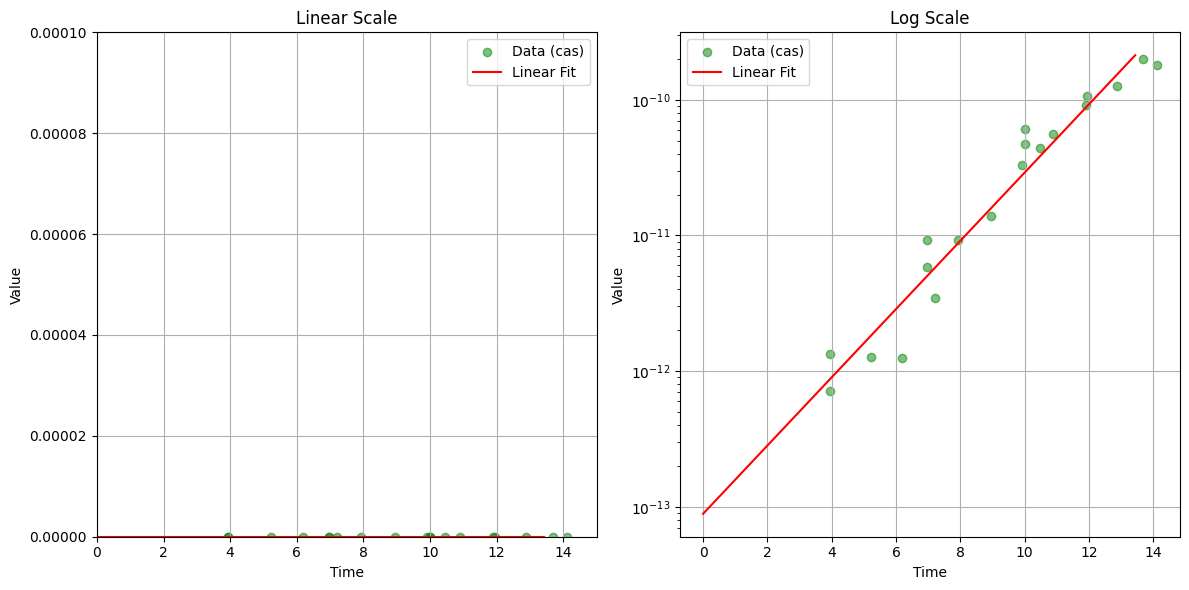

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.loadtxt('Casciari_1992CellProlif_EMT6_Fig7.txt', skiprows=2, delimiter=',')
t = data[:, 0]
d = data[:, 1]
m = 4 * np.pi / 3 * ((d * 1e-6 / 2) ** 3)

D = 2.0e-9  
a = 4.359379e-07
p0 = 151
V = 3.0318e7 
r_l = np.sqrt(6 * D * p0 / (a * V))

m0 = 4*np.pi*(r_l**3)/3 #1.2115931075920437e-05 #5.2985418922642075e-05 # 1.2115931075920437e-05  #0.000023228
print(f"m0: {m0}")

gamma = 2/3 #0.829
beta = 3/4#0.85#2/3/gamma
exponent = 1 - beta

# 筛选 t <= 8
mask = m <= m0
t_filtered = t[mask]
m_filtered = m[mask]

m_filtered_log = np.log(m_filtered)
coefficients = np.polyfit(t_filtered, m_filtered_log, 1)

b_opt = coefficients[0]  # 斜率
a_opt_log = coefficients[1]  # 截距
a_p = np.exp(a_opt_log)

print("\n=== Linear Fit on log(m) ===")
print(f"ln(a): {a_opt_log}")
print(f"a (exp of intercept): {a_p}")
print(f"b (slope): {b_opt}")

transition_cas = float(np.log(m0 / a_p) / b_opt)
print(f"transition time 1: {transition_cas:.4f}")

d_tran = a_p * b_opt * np.exp(b_opt * transition_cas)
print(f"slope at transition time: {d_tran:.10f}")

m_tran = a_p * np.exp(b_opt * transition_cas)
print(f"mass at transition time: {m_tran:.10f}")


t_cas_final = np.linspace(0, transition_cas, 100)
simple_exponential_fit = a_p * np.exp(b_opt * t_cas_final)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(t_filtered, m_filtered, color='g', alpha=0.5, label='Data (cas)')
plt.plot(t_cas_final, simple_exponential_fit, 'r-', label='Linear Fit')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Linear Scale')
plt.xlim(0, 15)
plt.ylim(0, 1e-4)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(t_filtered, m_filtered, color='g', alpha=0.5, label='Data (cas)')
plt.plot(t_cas_final, simple_exponential_fit, 'r-', label='Linear Fit')
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Log Scale')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



=== Linear Fit on log(m) ===
ln(a_2): -14.6619650101
a_2: 0.0000004289
b_2 (slope): 0.4744816964
t_1972_6: -16.0374
time_move: 29.4684
2.1263665645321627e-10


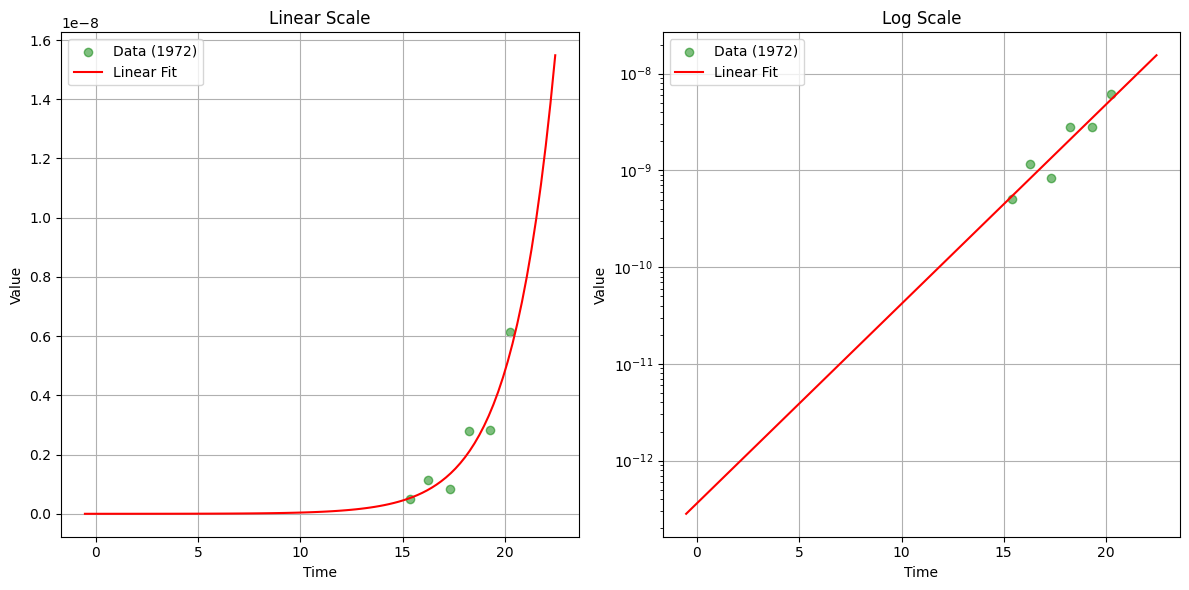

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('1972_fitall.csv')
t_filtered_2 = df['x'].values[:6]
y_volume_2 = df['Curve1'].values[:6]
m_filtered_2 = y_volume_2 * 1e-9

m_filtered_log_2 = np.log(m_filtered_2)
coefficients = np.polyfit(t_filtered_2, m_filtered_log_2, 1)

b_opt_2 = coefficients[0]  # 
a_opt_log_2 = coefficients[1]  # 
a_p_2 = np.exp(a_opt_log_2)

t_final_2 = np.linspace(-30, -7, 100)
simple_exponential_fit_2 = a_p_2 * np.exp(b_opt_2 * t_final_2)

print("\n=== Linear Fit on log(m) ===")
print(f"ln(a_2): {a_opt_log_2:.10f}")
print(f"a_2: {a_p_2:.10f}")
print(f"b_2 (slope): {b_opt_2:.10f}")
t_1972_6 = float(np.log(m_tran / a_p_2) / b_opt_2)
print(f"t_1972_6: {t_1972_6:.4f}")
time_move = transition_cas - t_1972_6
print(f"time_move: {time_move:.4f}")
print(a_p_2 * np.exp(b_opt_2 * (transition_cas-time_move)))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(t_filtered_2+time_move, m_filtered_2, color='g', alpha=0.5, label='Data (1972)')
plt.plot(t_final_2+time_move, simple_exponential_fit_2, 'r-', label='Linear Fit')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Linear Scale')
#plt.xlim(0, 15)
#plt.ylim(0, 1e-4)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(t_filtered_2+time_move, m_filtered_2, color='g', alpha=0.5, label='Data (1972)')
plt.plot(t_final_2+time_move, simple_exponential_fit_2, 'r-', label='Linear Fit')
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Log Scale')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Optimizing first model (with w parameter)...
First model optimization results:
w_opt: 0.2157187380
Mt_v_opt_exp: 0.0000036025
t2_opt_exp: 20.9852417931
Best loss: 0.0014766654

Optimizing second model (without w parameter)...
Second model optimization results:
Mt_v_opt: 0.0000032952
t2_opt: 22.8423522918
Best loss: 0.0016300117


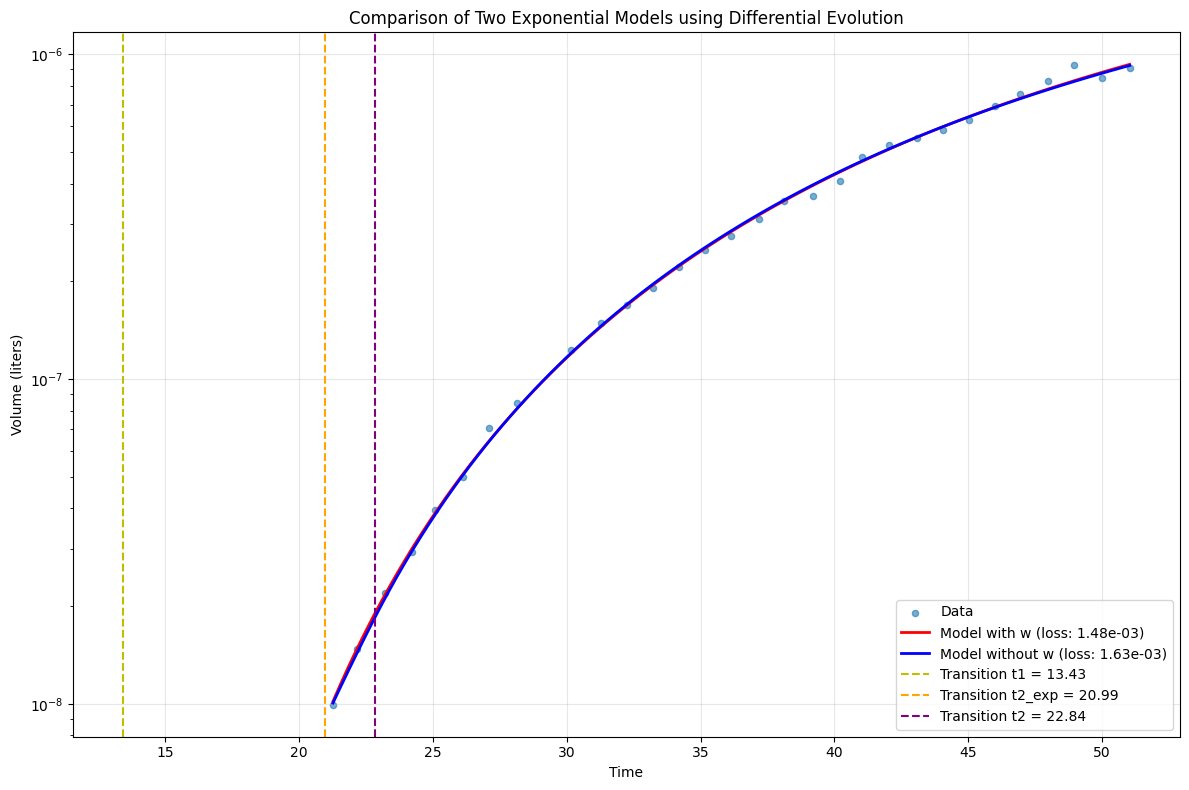


Model Comparison:
Model with w parameter - Loss: 1.476665e-03
Model without w parameter - Loss: 1.630012e-03
Model with w parameter performs better


In [61]:
from scipy.optimize import differential_evolution
import numpy as np
import matplotlib.pyplot as plt

t_sig = df['x'].values[6:] +time_move
y_sig = df['Curve1'].values[6:]
m_sig = y_sig * 1e-9

gamma1 = 2 / 3
#gamma2 = 8 / 9
beta = 3 / 4
exponent = 1 - beta

alpha0 = b_opt
alpha1 = b_opt_2
t1 = transition_cas

# 第一个模型（带w参数）
def exponential_phase_t_exp(x, w):
    return m_tran * np.exp((alpha0-alpha1)*np.exp(-w*(x-t1))*(x-t1) + alpha1*(x-t1))

def sigmoidal_phase_t_exp(x, w, Mt_v, t2):  
    mt_t2 = exponential_phase_t_exp(t2, w)
    rhs = mt_t2*((alpha0-alpha1)*np.exp(-w*(t2-t1))*(1-w*(t2-t1))+alpha1)
    
    c = 1 - (mt_t2 / Mt_v) ** exponent
    term1 = Mt_v
    term2 = (mt_t2 / Mt_v) ** beta
    lhs = c * term1 * term2
    D = rhs / lhs
    k_term = 1 - c * np.exp(-exponent * D * (x - t2))
    return Mt_v * (k_term ** (1 / exponent)), D

def piecewise_function_mt_exp(x, w, Mt_v, t2):
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask_1 = (x <= t1)
    mask_exp = (x > t1) & (x <= t2)
    mask_sig = (x > t2)
    if np.any(mask_1): 
        result[mask_1] = a_p * np.exp(b_opt * x[mask_1])
    if np.any(mask_exp):
        result[mask_exp] = exponential_phase_t_exp(x[mask_exp], w)
    if np.any(mask_sig):
        result[mask_sig],_ = sigmoidal_phase_t_exp(x[mask_sig], w, Mt_v, t2)
    return result

def loss_exp(params):
    w, Mt_v, t2 = params
    try:
        y_pred = piecewise_function_mt_exp(t_sig, w, Mt_v, t2)
        valid_mask = (m_sig != 0)
        loss_val = np.mean(((m_sig[valid_mask] - y_pred[valid_mask]) / m_sig[valid_mask]) ** 2)
        if np.isnan(loss_val) or np.isinf(loss_val):
            return 1e6
        return loss_val
    except:
        return 1e6

# 第二个模型（不带w参数）
def exponential_phase_t(x, t2):
    alpha = (alpha1 - alpha0)/(t2-t1)*(x-t1) + alpha0
    return m_tran * np.exp(alpha*(x-t1))
    
def sigmoidal_phase_t(x, Mt_v, t2):  
    mt_t2_val = exponential_phase_t(np.array([t2]), t2)[0]
    exponential_part = np.exp(alpha1 * (t2 - t1))
    linear_coeff = 2 * alpha1 - alpha0
    rhs = m_tran * exponential_part * linear_coeff
    
    c = 1 - (mt_t2_val / Mt_v) ** exponent
    term1 = Mt_v
    term2 = (mt_t2_val / Mt_v) ** beta
    lhs = c * term1 * term2
    D = rhs / lhs
    k_term = 1 - c * np.exp(-exponent * D * (x - t2))
    return Mt_v * (k_term ** (1 / exponent)), D

def piecewise_function_mt(x, Mt_v, t2):
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask_1 = (x <= t1)
    mask_exp = (x > t1) & (x <= t2)
    mask_sig = (x > t2)
    if np.any(mask_1): 
        result[mask_1] = a_p * np.exp(b_opt * x[mask_1])
    if np.any(mask_exp):
        result[mask_exp] = exponential_phase_t(x[mask_exp], t2)
    if np.any(mask_sig):
        sig_x = x[mask_sig]
        result_sig, _ = sigmoidal_phase_t(sig_x, Mt_v, t2)
        result[mask_sig] = result_sig
    return result

def loss(params):
    Mt_v, t2 = params
    try:
        y_pred = piecewise_function_mt(t_sig, Mt_v, t2)
        valid_mask = (m_sig != 0)
        loss_val = np.mean(((m_sig[valid_mask] - y_pred[valid_mask]) / m_sig[valid_mask]) ** 2)
        if np.isnan(loss_val) or np.isinf(loss_val):
            return 1e6
        return loss_val
    except:
        return 1e6

# 参数边界
bounds_exp = [(0.1, 0.5), (1e-6, 1e-5), (20, 25)]  # (w, Mt_v, t2)
bounds = [(1e-6, 1e-5), (20, 25)]  # (Mt_v, t2)

# 使用差分进化算法优化第一个模型（带w参数）
print("Optimizing first model (with w parameter)...")
result_exp = differential_evolution(loss_exp, bounds_exp, strategy='best1bin', 
                                   popsize=15, mutation=(0.5, 1), recombination=0.7, 
                                   tol=1e-6, seed=42, disp=False)

w_opt, Mt_v_opt_exp, t2_opt_exp = result_exp.x
best_loss_exp = result_exp.fun
print(f"First model optimization results:")
print(f"w_opt: {w_opt:.10f}")
print(f"Mt_v_opt_exp: {Mt_v_opt_exp:.10f}")
print(f"t2_opt_exp: {t2_opt_exp:.10f}")
print(f"Best loss: {best_loss_exp:.10f}")

# 使用差分进化算法优化第二个模型（不带w参数）
print("\nOptimizing second model (without w parameter)...")
result = differential_evolution(loss, bounds, strategy='best1bin', 
                               popsize=15, mutation=(0.5, 1), recombination=0.7, 
                               tol=1e-6, seed=42, disp=False)

Mt_v_opt, t2_opt = result.x
best_loss = result.fun
print(f"Second model optimization results:")
print(f"Mt_v_opt: {Mt_v_opt:.10f}")
print(f"t2_opt: {t2_opt:.10f}")
print(f"Best loss: {best_loss:.10f}")

# 生成拟合曲线
tt_1 = np.linspace(min(t_sig), max(t_sig), 100)
mt_sig_fit_exp = piecewise_function_mt_exp(tt_1, w_opt, Mt_v_opt_exp, t2_opt_exp)
mt_sig_fit = piecewise_function_mt(tt_1, Mt_v_opt, t2_opt)

# 绘制图形
plt.figure(figsize=(12, 8))
plt.scatter(t_sig, m_sig, label='Data', alpha=0.6, s=20)
plt.plot(tt_1, mt_sig_fit_exp, 'r-', linewidth=2, label=f'Model with w (loss: {best_loss_exp:.2e})')
plt.plot(tt_1, mt_sig_fit, 'b-', linewidth=2, label=f'Model without w (loss: {best_loss:.2e})')
plt.axvline(t1, color='y', linestyle='--', label=f'Transition t1 = {t1:.2f}')
plt.axvline(t2_opt_exp, color='orange', linestyle='--', label=f'Transition t2_exp = {t2_opt_exp:.2f}')
plt.axvline(t2_opt, color='purple', linestyle='--', label=f'Transition t2 = {t2_opt:.2f}')
plt.xlabel('Time')
plt.ylabel('Volume (liters)')
plt.title('Comparison of Two Exponential Models using Differential Evolution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.tight_layout()
plt.show()

# 输出更详细的比较结果
print("\nModel Comparison:")
print(f"Model with w parameter - Loss: {best_loss_exp:.6e}")
print(f"Model without w parameter - Loss: {best_loss:.6e}")
if best_loss_exp < best_loss:
    print("Model with w parameter performs better")
else:
    print("Model without w parameter performs better")

In [62]:
x_sigmoid = t_sig[t_sig > t2_opt]
if len(x_sigmoid) > 0:
    _, D_opt = sigmoidal_phase_t(x_sigmoid[0], Mt_v_opt, t2_opt)
    print(f"D_opt: {D_opt:.10f}")
else:
    print("Warning: No data points after t2, cannot compute D.")

if len(x_sigmoid) > 0:
    _, D_opt_exp = sigmoidal_phase_t_exp(x_sigmoid[0], w_opt, Mt_v_opt_exp, t2_opt_exp)
    print(f"D_opt_exp: {D_opt_exp:.10f}")
else:
    print("Warning: No data points after t2, cannot compute D.")

D_opt: 0.1392808561
D_opt_exp: 0.1326531611


In [63]:
print(f"Piecewise function at t2_opt: {piecewise_function_mt(t2_opt, Mt_v_opt, t2_opt)}")
print(f"Piecewise function at t2_opt_exp: {piecewise_function_mt_exp(t2_opt_exp, w_opt, Mt_v_opt_exp, t2_opt_exp)}")

Piecewise function at t2_opt: 1.8492873045373068e-08
Piecewise function at t2_opt_exp: 8.948883720412164e-09


Optimizing West model...

West model optimization results:
Mt_v_opt: 0.0000039298
t2_opt: 23.2892252024
D_opt: 0.1265625709
Best loss: 0.0021253201


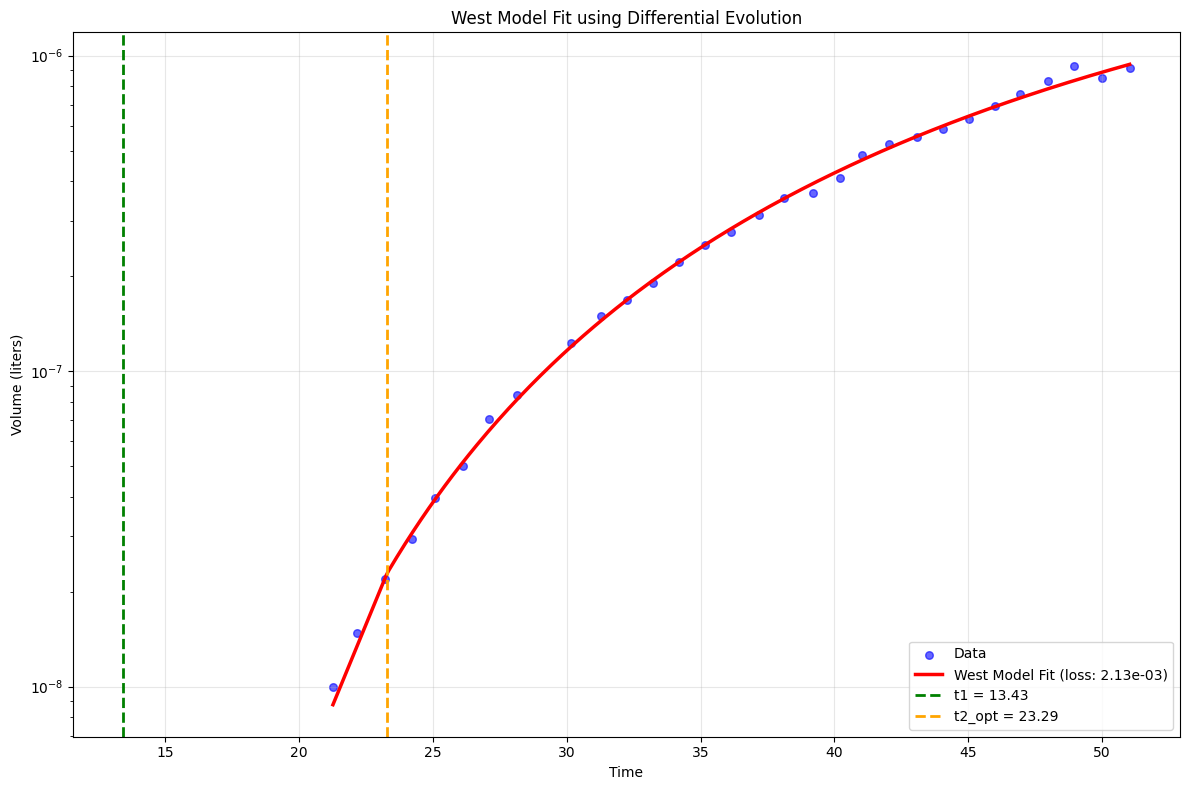


=== Detailed Analysis ===
Value at t1 (13.43): 2.126367e-10
Value at t2 (23.29): 2.286068e-08
Mt_v (asymptotic value): 3.929841e-06
Ratio t2/Mt_v: 0.0058


In [64]:
def piecewise_function_mt_west(x, Mt_v, t2, D):
    """West模型的分段函数"""
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask_1 = (x <= t1)
    mask_exp = (x > t1) & (x <= t2)
    mask_sig = (x > t2)
    
    if np.any(mask_1): 
        result[mask_1] = a_p * np.exp(b_opt * x[mask_1])
    
    if np.any(mask_exp):
        # 修正：这里应该是x[mask_exp]而不是x[mask_1]
        result[mask_exp] = a_p * np.exp(b_opt * t1) * np.exp(alpha1 * (x[mask_exp] - t1))
    
    if np.any(mask_sig):
        mt_t2_val = a_p * np.exp(b_opt * t1) * np.exp(alpha1 * (t2 - t1))
        k_term = 1 - (1 - (mt_t2_val / Mt_v) ** exponent) * np.exp(-exponent * D * (x[mask_sig] - t2))
        result_sig = Mt_v * (k_term ** (1 / exponent))
        result[mask_sig] = result_sig
    
    return result

def loss_west(params):
    """West模型的损失函数"""
    Mt_v, t2, D = params
    try:
        y_pred = piecewise_function_mt_west(t_sig, Mt_v, t2, D)
        valid_mask = (m_sig != 0) & (~np.isnan(y_pred)) & (~np.isinf(y_pred))
        
        if np.sum(valid_mask) == 0:
            return 1e6
            
        loss_val = np.mean(((m_sig[valid_mask] - y_pred[valid_mask]) / m_sig[valid_mask]) ** 2)
        
        if np.isnan(loss_val) or np.isinf(loss_val):
            return 1e6
            
        return loss_val
    except Exception as e:
        print(f"Error in loss calculation: {e}")
        return 1e6

# 设置参数边界
bounds_west = [
    (1e-6, 1e-5),    # Mt_v 范围
    (20, 25),        # t2 范围
    (0.01, 10)       # D 范围
]

# 使用差分进化算法优化
print("Optimizing West model...")
result_west = differential_evolution(
    loss_west, 
    bounds_west, 
    strategy='best1bin',
    popsize=20,
    mutation=(0.5, 1),
    recombination=0.7,
    tol=1e-8,
    maxiter=1000,
    seed=42,
    disp=False
)

# 提取最优参数
Mt_v_opt_west, t2_opt_west, D_opt_west = result_west.x
best_loss_west = result_west.fun

print(f"\nWest model optimization results:")
print(f"Mt_v_opt: {Mt_v_opt_west:.10f}")
print(f"t2_opt: {t2_opt_west:.10f}")
print(f"D_opt: {D_opt_west:.10f}")
print(f"Best loss: {best_loss_west:.10f}")

# 生成拟合曲线
tt_range = np.linspace(min(t_sig), max(t_sig), 300)
mt_fit_west = piecewise_function_mt_west(tt_range, Mt_v_opt_west, t2_opt_west, D_opt_west)

# 绘制结果
plt.figure(figsize=(12, 8))
plt.scatter(t_sig, m_sig, color='blue', alpha=0.6, s=30, label='Data')
plt.plot(tt_range, mt_fit_west, 'r-', linewidth=2.5, label=f'West Model Fit (loss: {best_loss_west:.2e})')

# 标记关键点
plt.axvline(t1, color='green', linestyle='--', linewidth=2, label=f't1 = {t1:.2f}')
plt.axvline(t2_opt_west, color='orange', linestyle='--', linewidth=2, label=f't2_opt = {t2_opt_west:.2f}')

plt.xlabel('Time')
plt.ylabel('Volume (liters)')
plt.title('West Model Fit using Differential Evolution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.tight_layout()
plt.show()

# 详细分析拟合结果
print("\n=== Detailed Analysis ===")

# 计算各阶段的拟合值
t1_val = piecewise_function_mt_west(np.array([t1]), Mt_v_opt_west, t2_opt_west, D_opt_west)[0]
t2_val = piecewise_function_mt_west(np.array([t2_opt_west]), Mt_v_opt_west, t2_opt_west, D_opt_west)[0]

print(f"Value at t1 ({t1:.2f}): {t1_val:.6e}")
print(f"Value at t2 ({t2_opt_west:.2f}): {t2_val:.6e}")
print(f"Mt_v (asymptotic value): {Mt_v_opt_west:.6e}")
print(f"Ratio t2/Mt_v: {t2_val/Mt_v_opt_west:.4f}")


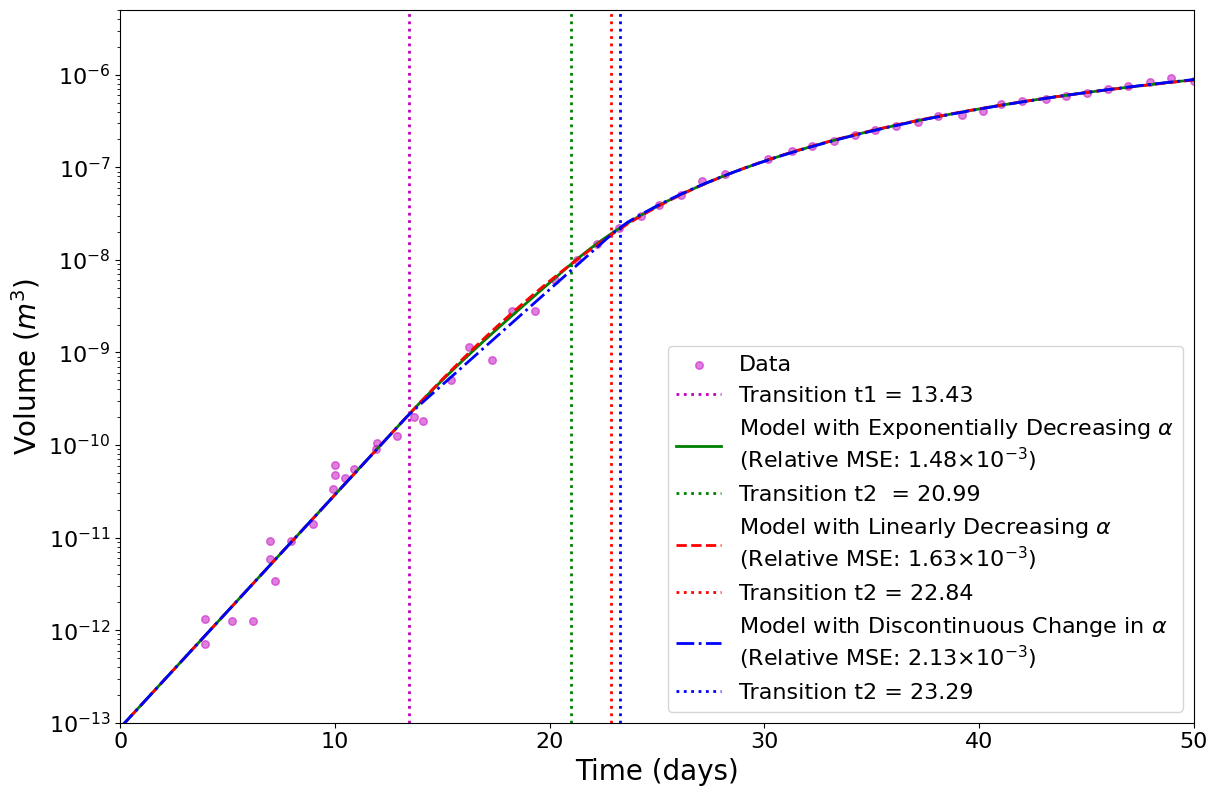


=== Model Comparison Summary ===
Model with w parameter:
  - Loss: 1.476665e-03
  - Parameters: w=0.215719, Mt_v=3.602485e-06, t2=20.985242
  - D parameter: 0.132653

Model without w parameter:
  - Loss: 1.630012e-03
  - Parameters: Mt_v=3.295175e-06, t2=22.842352
  - D parameter: 0.139281

✓ Model with w parameter performs better


In [65]:
# 生成拟合曲线
tt_37 = np.linspace(0, 60, 100)
mt_sig_fit_exp = piecewise_function_mt_exp(tt_37, w_opt, Mt_v_opt_exp, t2_opt_exp)
mt_sig_fit = piecewise_function_mt(tt_37, Mt_v_opt, t2_opt)
mt_sig_fit_west = piecewise_function_mt_west(tt_37, Mt_v_opt_west, t2_opt_west, D_opt_west)

# 绘制两个曲线的图
plt.figure(figsize=(12, 8))
plt.scatter(t_filtered, m_filtered, color='m', alpha=0.5, label='Data', s=30)
plt.scatter(t_filtered_2 + time_move, m_filtered_2, color='m', alpha=0.5, s=30)
plt.scatter(t_sig, m_sig, color='m', alpha=0.5, s=30)
plt.axvline(t1, color='m', linestyle=':', linewidth=2, label=f'Transition t1 = {t1:.2f}')

# 绘制两个模型的拟合曲线
plt.plot(tt_37, mt_sig_fit_exp, color='green', linestyle='-', linewidth=2, 
    label=rf'Model with Exponentially Decreasing $\alpha$'f'\n'rf'(Relative MSE: {(best_loss_exp*1e3):.2f}$\times 10^{{-3}}$)')
plt.axvline(t2_opt_exp, color='g', linestyle=':', linewidth=2, label=f'Transition t2  = {t2_opt_exp:.2f}')
plt.plot(tt_37, mt_sig_fit, color='red', linestyle='--', linewidth=2, 
    label=rf'Model with Linearly Decreasing $\alpha$'f'\n'rf'(Relative MSE: {(best_loss*1e3):.2f}$\times 10^{{-3}}$)')
plt.axvline(t2_opt, color='r', linestyle=':', linewidth=2, label=f'Transition t2 = {t2_opt:.2f}')
plt.plot(tt_37, mt_sig_fit_west, color='b', linestyle='-.', linewidth=2, 
    label=rf'Model with Discontinuous Change in $\alpha$'f'\n'rf'(Relative MSE: {(best_loss_west*1e3):.2f}$\times 10^{{-3}}$)')
plt.axvline(t2_opt_west, color='b', linestyle=':', linewidth=2, label=f'Transition t2 = {t2_opt_west:.2f}')

plt.xlabel('Time (days)', fontsize=20)
plt.ylabel('Volume ($m^3$)', fontsize=20)
plt.xlim(0, 50)
plt.ylim(1e-13, 5e-6)
#plt.title('Comparison of Two Exponential Models (Differential Evolution Optimization)')
plt.legend(fontsize=16)
#plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.tight_layout()
plt.tick_params(axis='both', which='both', labelsize=16)
plt.savefig('compare_3_alpha.png', dpi=80, bbox_inches='tight') 
plt.show()

print("\n=== Model Comparison Summary ===")
print(f"Model with w parameter:")
print(f"  - Loss: {best_loss_exp:.6e}")
print(f"  - Parameters: w={w_opt:.6f}, Mt_v={Mt_v_opt_exp:.6e}, t2={t2_opt_exp:.6f}")
print(f"  - D parameter: {D_opt_exp:.6f}")

print(f"\nModel without w parameter:")
print(f"  - Loss: {best_loss:.6e}")
print(f"  - Parameters: Mt_v={Mt_v_opt:.6e}, t2={t2_opt:.6f}")
print(f"  - D parameter: {D_opt:.6f}")

if best_loss_exp < best_loss:
    print("\n✓ Model with w parameter performs better")
else:
    print("\n✓ Model without w parameter performs better")

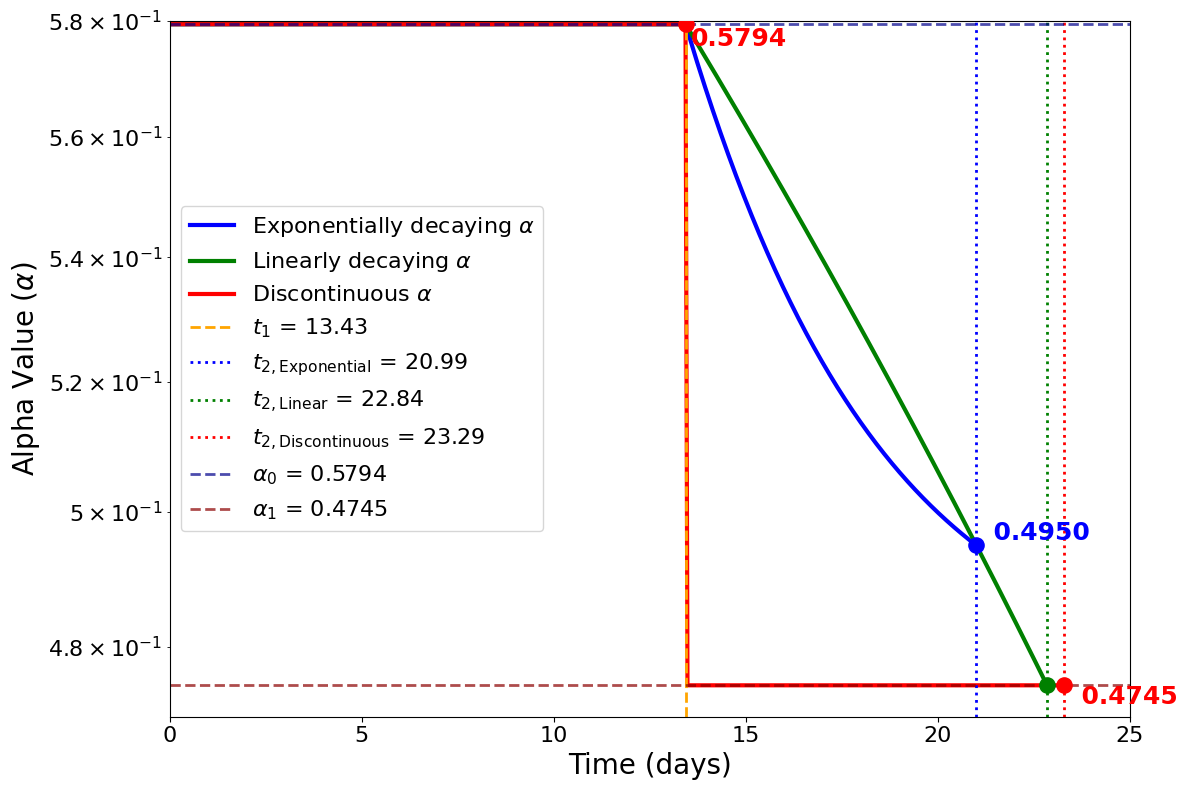

In [66]:
# 定义计算alpha的函数
def alpha_exp_model(x, w, t2_end):
    """计算带w参数的指数模型中的alpha值，在t2_end处截断"""
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask_before_t1 = (x <= t1)
    mask_t1_to_t2 = (x > t1) & (x <= t2_end)
    mask_after_t2 = (x > t2_end)
    
    if np.any(mask_before_t1):
        result[mask_before_t1] = alpha0  # t1之前保持alpha0
    
    if np.any(mask_t1_to_t2):
        x_mid = x[mask_t1_to_t2]
        result[mask_t1_to_t2] = (alpha0 - alpha1) * np.exp(-w * (x_mid - t1)) + alpha1
    
    if np.any(mask_after_t2):
        result[mask_after_t2] = alpha_exp_model(t2_end, w, t2_end)  # t2之后保持t2时刻的值
    
    return result

def alpha_linear_model(x, t2_end):
    """计算不带w参数的线性模型中的alpha值，在t2_end处截断"""
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask_before_t1 = (x <= t1)
    mask_t1_to_t2 = (x > t1) & (x <= t2_end)
    mask_after_t2 = (x > t2_end)
    
    if np.any(mask_before_t1):
        result[mask_before_t1] = alpha0  # t1之前保持alpha0
    
    if np.any(mask_t1_to_t2):
        x_mid = x[mask_t1_to_t2]
        result[mask_t1_to_t2] = (alpha1 - alpha0) / (t2_end - t1) * (x_mid - t1) + alpha0
    
    if np.any(mask_after_t2):
        result[mask_after_t2] = alpha1  # t2之后保持alpha1
    
    return result

def alpha_west_model(x, t2_end):
    """计算West模型中的alpha值，在t2_end处截断"""
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask_before_t1 = (x <= t1)
    mask_t1_to_t2 = (x > t1) & (x <= t2_end)
    mask_after_t2 = (x > t2_end)
    
    if np.any(mask_before_t1):
        result[mask_before_t1] = alpha0  # t1之前保持alpha0
    
    if np.any(mask_t1_to_t2):
        result[mask_t1_to_t2] = alpha1  # t1到t2之间直接跳变到alpha1
    
    if np.any(mask_after_t2):
        result[mask_after_t2] = alpha1  # t2之后保持alpha1
    
    return result

# 生成完整的时间序列（从0开始）
t_start = 0
t_end = max(t2_opt, t2_opt_exp, t2_opt_west) + 2  # 稍微超过最大的t2
t_range = np.linspace(t_start, t_end, 500)

# 计算三个模型的alpha值（各自截断到对应的t2）
alpha_exp_values = alpha_exp_model(t_range, w_opt, t2_opt_exp)
alpha_linear_values = alpha_linear_model(t_range, t2_opt)
alpha_west_values = alpha_west_model(t_range, t2_opt_west)

# 绘制alpha变化图
plt.figure(figsize=(12, 8))

# 绘制alpha曲线（只画到各自的t2）
# 带w参数的指数模型
mask_exp = t_range <= t2_opt_exp
plt.plot(t_range[mask_exp], alpha_exp_values[mask_exp], 'b-', linewidth=3, 
         label=rf'Exponentially decaying $\alpha$')

# 不带w参数的线性模型
mask_linear = t_range <= t2_opt
plt.plot(t_range[mask_linear], alpha_linear_values[mask_linear], 'g-', linewidth=3, 
         label=rf'Linearly decaying $\alpha$')

# West模型（不连续变化）
mask_west = t_range <= t2_opt_west
plt.plot(t_range[mask_west], alpha_west_values[mask_west], 'r-', linewidth=3, 
         label=rf'Discontinuous $\alpha$')

# 标记关键点
plt.axvline(t1, color='orange', linestyle='--', linewidth=2, 
           label=rf'$t_1$ = {t1:.2f}')

# 标记各个模型的t2点
plt.axvline(t2_opt_exp, color='blue', linestyle=':', linewidth=2, 
           label=rf'$t_{{2,\text{{Exponential}}}}$ = {t2_opt_exp:.2f}')
plt.axvline(t2_opt, color='green', linestyle=':', linewidth=2, 
           label=rf'$t_{{2,\text{{Linear}}}}$ = {t2_opt:.2f}')
plt.axvline(t2_opt_west, color='red', linestyle=':', linewidth=2, 
           label=rf'$t_{{2,\text{{Discontinuous}}}}$ = {t2_opt_west:.2f}')

plt.axhline(alpha0, color='darkblue', linestyle='--', alpha=0.7, linewidth=2, 
           label=rf'$\alpha_0$ = {alpha0:.4f}')
plt.axhline(alpha1, color='darkred', linestyle='--', alpha=0.7, linewidth=2, 
           label=rf'$\alpha_1$ = {alpha1:.4f}')

# 标记关键值点
plt.scatter(t1, alpha0, color='red', s=120, zorder=10, marker='o')
plt.scatter(t2_opt_exp, alpha_exp_model(t2_opt_exp, w_opt, t2_opt_exp), 
           color='blue', s=120, zorder=10, marker='o')
plt.scatter(t2_opt, alpha1, color='green', s=120, zorder=10, marker='o')
plt.scatter(t2_opt_west, alpha1, color='red', s=120, zorder=10, marker='o')

# 添加文本标注
plt.text(t1+1.4, alpha0 - 0.0005, f'{alpha0:.4f}', 
         ha='center', va='top',fontweight='bold',  fontsize=18,  color='red')
plt.text(t2_opt_exp, alpha_exp_model(t2_opt_exp, w_opt, t2_opt_exp), 
         f'  {alpha_exp_model(t2_opt_exp, w_opt, t2_opt_exp):.4f}', 
         verticalalignment='bottom',fontweight='bold',  fontsize=18, color='blue')
plt.text(t2_opt_west, alpha1, f'  {alpha1:.4f}', 
         verticalalignment='top', fontsize=18, fontweight='bold', color='red')
#'top', 'bottom', 'center', 'baseline', 'center_baseline'
plt.xlabel('Time (days)', fontsize=20)
plt.ylabel('Alpha Value ($\\alpha$)', fontsize=20)
plt.legend(loc='center left', fontsize=16)
plt.xlim(0, 25)
plt.ylim(0.47, 0.58)
plt.tick_params(axis='both', which='both', labelsize=16)
plt.yscale('log')
plt.tight_layout()
plt.savefig('compare_3_alpha_direct.png', dpi=80, bbox_inches='tight') 
plt.show()


Mv_v for model with w: 0.0000003328
Mv_v for model without w: 0.0000000152
alpha1_v: 0.3163211310


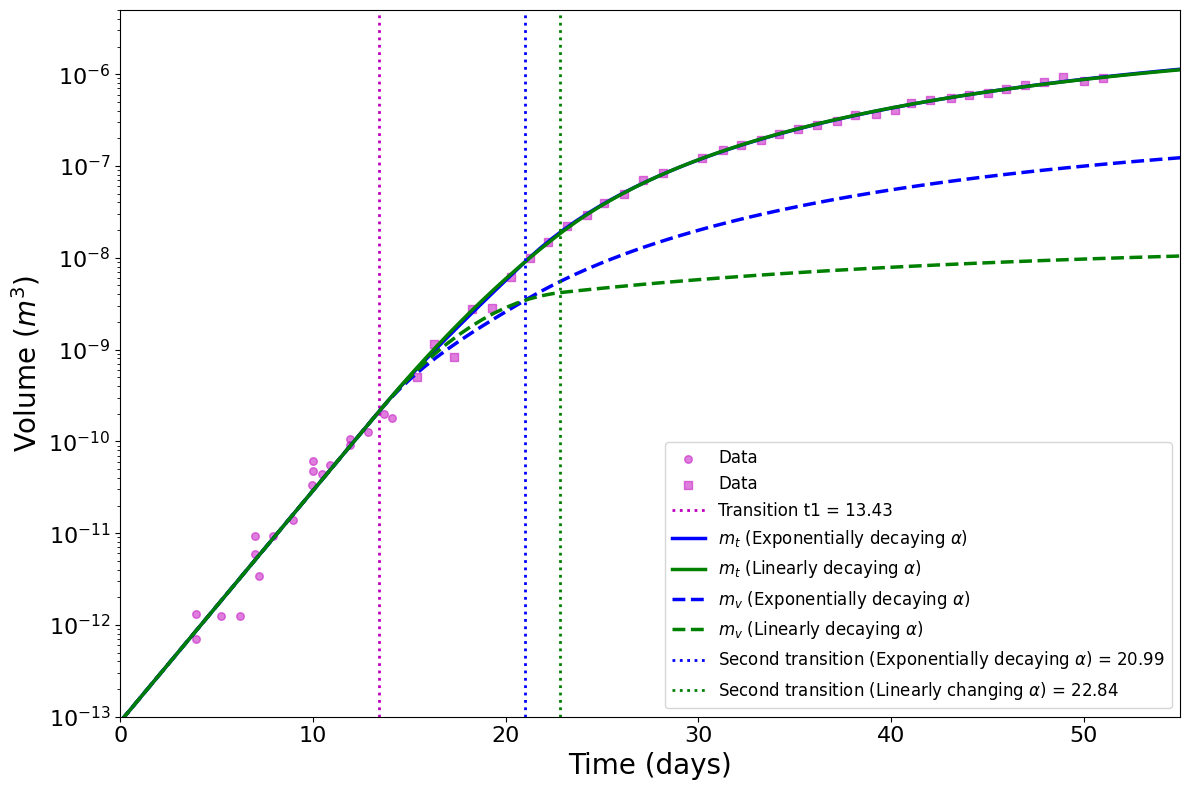


=== Model Parameters Summary ===
Model with w parameters:
  - w: 0.215719
  - Mt_v: 3.602485e-06
  - t2: 20.985242
  - D: 0.132653
  - Mv_v: 3.328291e-07

Model without w parameters:
  - Mt_v: 3.295175e-06
  - t2: 22.842352
  - D: 0.139281
  - Mv_v: 1.524684e-08

alpha1_v = alpha1 * gamma1 = 0.474482 * 0.666667 = 0.316321


In [71]:
gamma1 = 2/3

# 第一个模型（带w参数）
t2_exp = t2_opt_exp
def exponential_phase_v_exp(x):
    return m_tran * np.exp((alpha0-alpha1*gamma1)*np.exp(-w_opt*(x-t1))*(x-t1) + alpha1*gamma1*(x-t1))

# 计算第一个模型的Mv_v
mv_t2_exp = exponential_phase_v_exp(t2_exp)
gradientmv_t2_exp = mv_t2_exp*((alpha0-alpha1*gamma1)*np.exp(-w_opt*(t2_exp-t1))*(1-w_opt*(t2_exp-t1))+alpha1*gamma1)
Mv_v_exp = ((gradientmv_t2_exp/D_opt_exp + mv_t2_exp)/ (mv_t2_exp**beta))**(1/(1-beta))
print(f"Mv_v for model with w: {Mv_v_exp:.10f}")

def sigmoidal_phase_v_exp(x):  
    mv_t2 = exponential_phase_v_exp(t2_exp)  
    c = 1 - (mv_t2 / Mv_v_exp) ** exponent
    k_term = 1 - c * np.exp(-exponent * D_opt_exp * (x - t2_exp))
    return Mv_v_exp * (k_term ** (1 / exponent))

def piecewise_function_mv_exp(x):
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask_1 = (x <= t1)
    mask_exp = (x > t1) & (x <= t2_exp)
    mask_sig = (x > t2_exp)
    if np.any(mask_1): 
        result[mask_1] = a_p * np.exp(b_opt * x[mask_1])
    if np.any(mask_exp):
        result[mask_exp] = exponential_phase_v_exp(x[mask_exp])
    if np.any(mask_sig):
        result[mask_sig] = sigmoidal_phase_v_exp(x[mask_sig])
    return result

# 第二个模型（不带w参数）
t2 = t2_opt
def exponential_phase_v(x):
    alpha = (alpha1*gamma1 - alpha0)/(t2-t1)*(x-t1) + alpha0
    return m_tran * np.exp(alpha*(x-t1))

# 计算第二个模型的Mv_v
mv_t2 = exponential_phase_v(t2)
exponential_part = np.exp(alpha1*gamma1 * (t2 - t1))
linear_coeff = 2 * alpha1*gamma1 - alpha0
gradientmv_t2 = m_tran * exponential_part * linear_coeff
Mv_v = ((gradientmv_t2/D_opt + mv_t2)/ (mv_t2**beta))**(1/(1-beta))
print(f"Mv_v for model without w: {Mv_v:.10f}")

def sigmoidal_phase_v(x):  
    mv_t2 = exponential_phase_v(t2)
    c = 1 - (mv_t2 / Mv_v) ** exponent
    k_term = 1 - c * np.exp(-exponent * D_opt * (x - t2))
    return Mv_v * (k_term ** (1 / exponent))

def piecewise_function_mv(x):
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask_1 = (x <= t1)
    mask_exp = (x > t1) & (x <= t2)
    mask_sig = (x > t2)
    if np.any(mask_1): 
        result[mask_1] = a_p * np.exp(b_opt * x[mask_1])
    if np.any(mask_exp):
        result[mask_exp] = exponential_phase_v(x[mask_exp])
    if np.any(mask_sig):
        result[mask_sig] = sigmoidal_phase_v(x[mask_sig])
    return result

print(f"alpha1_v: {alpha1*gamma1:.10f}")

# 生成两个模型的mv曲线
tt_mv_plt = np.linspace(0, 60, 100)
mv_plt_exp = piecewise_function_mv_exp(tt_mv_plt)  # 带w参数的模型
mv_plt = piecewise_function_mv(tt_mv_plt)         # 不带w参数的模型

# 生成mt曲线（从之前的优化结果）
tt_37 = np.linspace(0, 60, 100)
mt_sig_fit_exp = piecewise_function_mt_exp(tt_37, w_opt, Mt_v_opt_exp, t2_opt_exp)
mt_sig_fit = piecewise_function_mt(tt_37, Mt_v_opt, t2_opt)

# 绘制图形
plt.figure(figsize=(12, 8))

# 绘制实验数据
plt.scatter(t_filtered, m_filtered, color='m',marker='o', alpha=0.5, label='Data', s=30)
plt.scatter(t_filtered_2 + time_move, m_filtered_2,marker='s', color='m', alpha=0.5,label='Data', s=30)
plt.scatter(t_sig, m_sig, color='m',marker='s', alpha=0.5, s=30)
plt.axvline(t1, color='m', linestyle=':', linewidth=2, label=f'Transition t1 = {t1:.2f}')

# 绘制mt曲线（两个模型）
plt.plot(tt_37, mt_sig_fit_exp, 'b-', linewidth=2.5, label=r'$m_t$ (Exponentially decaying $\alpha$)')
plt.plot(tt_37, mt_sig_fit, 'g-', linewidth=2.5, label=r'$m_t$ (Linearly decaying $\alpha$)')

# 绘制mv曲线（两个模型）
plt.plot(tt_mv_plt, mv_plt_exp, 'b--', linewidth=2.5, label=r'$m_v$ (Exponentially decaying $\alpha$)')
plt.plot(tt_mv_plt, mv_plt, 'g--', linewidth=2.5, label=r'$m_v$ (Linearly decaying $\alpha$)')

# 添加过渡时间线
plt.axvline(t2_opt_exp, color='b', linestyle=':', linewidth=2, 
           label=f'Second transition (Exponentially decaying $\\alpha$) = {t2_opt_exp:.2f}')
plt.axvline(t2_opt, color='g', linestyle=':', linewidth=2, 
           label=f'Second transition (Linearly changing $\\alpha$) = {t2_opt:.2f}')

plt.xlabel('Time (days)', fontsize=20)
plt.ylabel('Volume ($m^3$)', fontsize=20)
plt.xlim(0, 55)
plt.ylim(1e-13, 5e-6)
plt.legend(loc='lower right', fontsize=12)
plt.yscale('log')
plt.tick_params(axis='both', which='both', labelsize=16)
#plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('EMT6_mv.png', dpi=300, bbox_inches='tight')
plt.show()

# 输出详细信息
print("\n=== Model Parameters Summary ===")
print(f"Model with w parameters:")
print(f"  - w: {w_opt:.6f}")
print(f"  - Mt_v: {Mt_v_opt_exp:.6e}")
print(f"  - t2: {t2_opt_exp:.6f}")
print(f"  - D: {D_opt_exp:.6f}")
print(f"  - Mv_v: {Mv_v_exp:.6e}")

print(f"\nModel without w parameters:")
print(f"  - Mt_v: {Mt_v_opt:.6e}")
print(f"  - t2: {t2_opt:.6f}")
print(f"  - D: {D_opt:.6f}")
print(f"  - Mv_v: {Mv_v:.6e}")

print(f"\nalpha1_v = alpha1 * gamma1 = {alpha1:.6f} * {gamma1:.6f} = {alpha1*gamma1:.6f}")

0.31632113095529907
0.6666666666666666


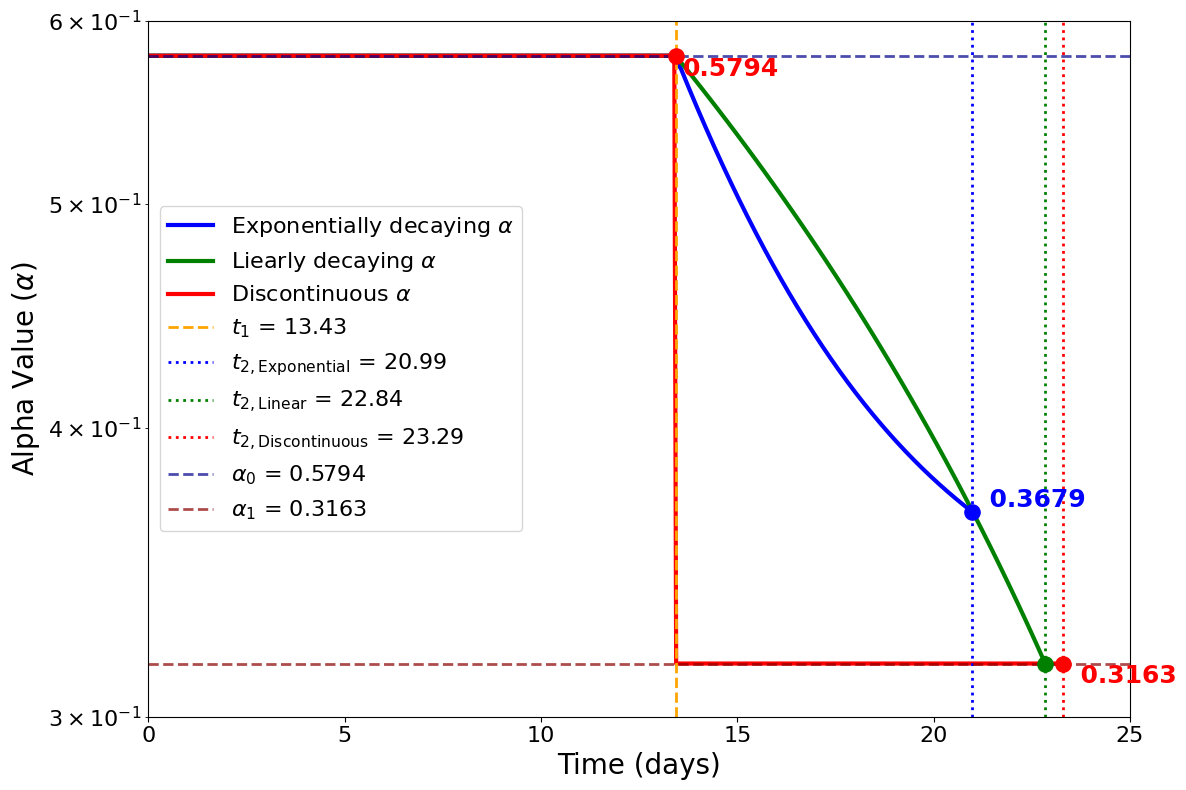

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# 定义alpha函数
def alpha_with_w(x):
    """带w参数的模型：alpha随时间指数衰减"""
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask_t1 = (x <= t1)
    mask_exp = (x > t1)
    
    result[mask_t1] = alpha0  # 0到t1阶段：alpha0
    result[mask_exp] = (alpha0 - alpha1*gamma1) * np.exp(-w_opt*(x[mask_exp] - t1)) + alpha1*gamma1
    
    return result

def alpha_without_w(x):
    """不带w参数的模型：alpha随时间线性变化"""
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask_t1 = (x <= t1)
    mask_exp = (x > t1)
    
    result[mask_t1] = alpha0  # 0到t1阶段：alpha0
    # t1到t2阶段：线性变化
    result[mask_exp] = np.where(
        x[mask_exp] <= t2_opt,
        (alpha1*gamma1 - alpha0)/(t2_opt - t1)*(x[mask_exp] - t1) + alpha0,
        alpha1*gamma1  # t2之后保持为alpha1*gamma1
    )
    
    return result

def alpha_west_model(x, t2_end):
    """计算West模型中的alpha值"""
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask_before_t1 = (x <= t1)
    mask_after_t1 = (x > t1)
    
    if np.any(mask_before_t1):
        result[mask_before_t1] = alpha0  # t1之前保持alpha0
    
    if np.any(mask_after_t1):
        result[mask_after_t1] = alpha1*gamma1  # t1之后跳变到alpha1
    
    return result

# 生成各自的时间序列（分别到对应的t2）
tt_w = np.linspace(0, t2_opt_exp, 100)      # 带w模型：到t2_opt_exp
tt_wo_w = np.linspace(0, t2_opt, 100)       # 不带w模型：到t2_opt
tt_west = np.linspace(0, t2_opt_west, 500)  # West模型：到t2_opt_west

# 计算三种模型的alpha值（分别到对应的t2）
alpha_w = alpha_with_w(tt_w)
alpha_wo_w = alpha_without_w(tt_wo_w)
alpha_west = alpha_west_model(tt_west, t2_opt_west)

print(alpha1*gamma1)
print(gamma1)
# 绘制图形
plt.figure(figsize=(12, 8))

# 绘制alpha曲线（分别到对应的t2）
plt.plot(tt_w, alpha_w, 'b-', linewidth=3, label=r'Exponentially decaying $\alpha$')
plt.plot(tt_wo_w, alpha_wo_w, 'g-', linewidth=3, label=r'Liearly decaying $\alpha$')
plt.plot(tt_west, alpha_west, 'r-', linewidth=3, label=r'Discontinuous $\alpha$')

plt.axvline(t1, color='orange', linestyle='--', linewidth=2, 
           label=rf'$t_1$ = {t1:.2f}')
plt.axvline(t2_opt_exp, color='blue', linestyle=':', linewidth=2, 
           label=rf'$t_{{2,\text{{Exponential}}}}$ = {t2_opt_exp:.2f}')
plt.axvline(t2_opt, color='green', linestyle=':', linewidth=2, 
           label=rf'$t_{{2,\text{{Linear}}}}$ = {t2_opt:.2f}')
plt.axvline(t2_opt_west, color='red', linestyle=':', linewidth=2, 
           label=rf'$t_{{2,\text{{Discontinuous}}}}$ = {t2_opt_west:.2f}')

plt.axhline(alpha0, color='darkblue', linestyle='--', alpha=0.7, linewidth=2, 
           label=rf'$\alpha_0$ = {alpha0:.4f}')
plt.axhline(alpha1*gamma1, color='darkred', linestyle='--', alpha=0.7, linewidth=2, 
           label=rf'$\alpha_1$ = {alpha1*gamma1:.4f}')

plt.scatter(t1, alpha0, color='red', s=120, zorder=10, marker='o')
plt.scatter(t2_opt_exp, alpha_with_w(t2_opt_exp), 
           color='blue', s=120, zorder=10, marker='o')
plt.scatter(t2_opt, alpha1*gamma1, color='green', s=120, zorder=10, marker='o')
plt.scatter(t2_opt_west, alpha1*gamma1, color='red', s=120, zorder=10, marker='o')

plt.text(t1+1.4, alpha0 - 0.0005, f'{alpha0:.4f}', 
         ha='center', va='top',fontweight='bold',  fontsize=18,  color='red')
plt.text(t2_opt_exp, alpha_with_w(t2_opt_exp), 
         f'  {alpha_with_w(t2_opt_exp):.4f}', 
         verticalalignment='bottom',fontweight='bold',  fontsize=18, color='blue')
plt.text(t2_opt_west, alpha1*gamma1, f'  {alpha1*gamma1:.4f}', 
         verticalalignment='top', fontsize=18, fontweight='bold', color='red')

plt.xlabel('Time (days)', fontsize=20)
plt.ylabel('Alpha Value ($\\alpha$)', fontsize=20)
plt.legend(loc='center left', fontsize=16)
plt.xlim(0, 25)
plt.ylim(0.3, 0.6)
plt.tick_params(axis='both', which='both', labelsize=16)
plt.yscale('log')
plt.tight_layout()
plt.savefig('compare_3_alpha_direct_v.png', dpi=80, bbox_inches='tight') 
plt.show()


In [73]:
gamma1 = 2/3
t2 = t2_opt
def exponential_phase_v(x):
    alpha = (alpha1*gamma1 - alpha0)/(t2-t1)*(x-t1) + alpha0
    return m_tran * np.exp(alpha*(x-t1))
'''
def exponential_phase_v_exp(x):
    return m_tran * np.exp((alpha0-alpha1*gamma1)*np.exp(-w_opt*(x-t1))*(x-t1) + alpha1*gamma1*(x-t1))
    
mv_t2 = exponential_phase_v(t2_opt)
print(mv_t2)
gradientmv_t2 = mv_t2*((alpha0-alpha1*gamma1)*np.exp(-w_opt*(t2_opt-t1))*(1-w_opt*(t2_opt-t1))+alpha1*gamma1)
#M_v_2 = ((gradientmv_t2 + D_opt*m_trans_mv)/ D_opt/(m_trans_mv**beta))**(beta-1)
Mv_v = ((gradientmv_t2/D_opt + mv_t2)/ (mv_t2**beta))**(1/(1-beta))
print(Mv_v)
'''
exponential_part = np.exp(alpha1*gamma1 * (t2 - t1))
linear_coeff = 2 * alpha1*gamma1 - alpha0
gradientmv_t2 = m_tran * exponential_part * linear_coeff
Mv_v = ((gradientmv_t2/D_opt + mv_t2)/ (mv_t2**beta))**(1/(1-beta))
print(Mv_v)

print(f"alpha1_v: {alpha1*gamma1:.10f}")

1.5246843118701272e-08
alpha1_v: 0.3163211310


In [ ]:
'''
def exponential_phase_v_exp(x):
    return m_tran * np.exp((alpha0-alpha1*gamma1)*np.exp(-w_opt*(x-t1))*(x-t1) + alpha1*gamma1*(x-t1))

def sigmoidal_phase_v_exp(x):  
    mv_t2 = exponential_phase_v(t2)  
    c = 1 - (mv_t2 / Mv_v) ** exponent
    k_term = 1 - c * np.exp(-exponent * D_opt * (x - t2))
    return Mv_v * (k_term ** (1 / exponent))

def piecewise_function_mv_exp(x):
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask_1 = (x <= t1)
    mask_exp = (x > t1) & (x <= t2)
    mask_sig = (x > t2)
    if np.any(mask_1): 
        result[mask_1] = a_p * np.exp(b_opt * x[mask_1])
    if np.any(mask_exp):
        result[mask_exp] = exponential_phase_v(x[mask_exp])
    if np.any(mask_sig):
        result[mask_sig]= sigmoidal_phase_v(x[mask_sig])
    return result
'''
    
def sigmoidal_phase_v(x):  
    mv_t2 = exponential_phase_v(t2)
    c = 1 - (mv_t2 / Mv_v) ** exponent
    k_term = 1 - c * np.exp(-exponent * D_opt * (x - t2))
    return Mv_v * (k_term ** (1 / exponent))

def piecewise_function_mv(x):
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask_1 = (x <= t1)
    mask_exp = (x > t1) & (x <= t2)
    mask_sig = (x > t2)
    if np.any(mask_1): 
        result[mask_1] = a_p * np.exp(b_opt * x[mask_1])
    if np.any(mask_exp):
        result[mask_exp] = exponential_phase_v(x[mask_exp])
    if np.any(mask_sig):
        result[mask_sig]= sigmoidal_phase_v(x[mask_sig])
    return result
tt_mv_plt = np.linspace(0, 60, 100)
mv_plt = piecewise_function_mv(tt_mv_plt)

plt.figure(figsize=(10, 6))
plt.scatter(t_filtered, m_filtered, color='g', marker='s', label='Experimental data')
plt.scatter(t_filtered_2+time_move, m_filtered_2, color='g',marker='^' , label='Experimental data')
#plt.plot(t_cas_final, simple_exponential_fit, 'g-', label='Linear Fit')
plt.scatter(t_sig, m_sig, color='g',marker='^')
plt.plot(tt_37, mt_sig_fit, 'g-', label='$m_t$')
plt.plot(tt_mv_plt, mv_plt, 'b--', label='$m_v$')
plt.axvline(transition_cas, color='y', linestyle='--', label=f'First transition time = {transition_cas:.2f}')
plt.axvline(t2_opt, color='Orange', linestyle='--', label=f'Second transition time = {t2_opt:.2f}')
plt.xlabel('Time (days)')
plt.ylabel('Volume ($m^3$)')
plt.xlim(0,55)
plt.ylim(1e-13,5e-6)
#plt.title('Exponential Model Fit (Differential Evolution)')
plt.legend()
#plt.grid(True)
plt.yscale('log')
plt.savefig('EMT6_glinear.png')
plt.show()    

In [ ]:
tt_alpha_plt = np.linspace(transition_cas, t2, 100)
alpha_plt = (alpha0-alpha1)*np.exp(-w_opt*(tt_alpha_plt-t1)) + alpha1
plt.figure(figsize=(10, 6))
plt.plot(tt_alpha_plt, alpha_plt, 'r-', label='alpha')
plt.axvline(transition_cas, color='y', linestyle='--', label=f'Transition t1 = {transition_cas:.2f}')
plt.axvline(t2_opt, color='Orange', linestyle='--', label=f'Transition t2 = {t2_opt:.2f}')
plt.xlabel('Time')
plt.ylabel('alpha')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()    

In [ ]:
tt_vt_plt = np.linspace(0, 80, 200)
mv_plt_all = piecewise_function_mv(tt_vt_plt)
mt_plt_all = piecewise_function_mt(tt_vt_plt, w_opt, Mt_v_opt, t2_opt)

plt.figure(figsize=(10, 6))
plt.plot(tt_vt_plt, mv_plt_all/mt_plt_all, 'g-', label='mv/mt')
#plt.plot(tt_vt_plt, mv_plt_all, 'r-', label='mv/mt')
#plt.plot(tt_vt_plt, mt_plt_all, 'g--', label='mv/mt')
plt.axvline(transition_cas, color='y', linestyle='--', label=f'Transition t1 = {transition_cas:.2f}')
plt.axvline(t2_opt, color='Orange', linestyle='--', label=f'Transition t2 = {t2_opt:.2f}')
plt.xlabel('Time (t)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

r_l: 0.000233m
0.00023300000000000005


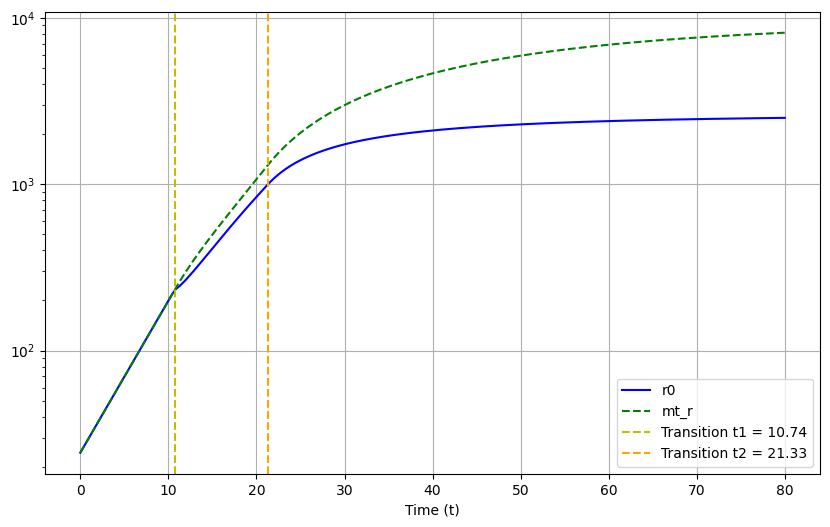

0.000838452750194574


In [27]:
D = 2.0e-9          #  (m²/s)
p0 = 100             #  (mmHg)
a = 7.29e-7         #  (m³/(kg·s))
V = 3.0318e7        #  (mmHg·kg/m³)

r_l = np.sqrt(6 * D * p0 / (a * V))
print(f"r_l: {r_l:.6f}m")

def r_0(t):
    return r_l /np.sqrt(3 - 2*t - 3*((1-t)**(2/3)))
    #return np.sqrt(2) * r_l / np.sqrt(1 - np.cos(3 * np.arccos(1/2 - (1 - t)**(1/3))))

def pie_r0(x):
    x = np.asarray(x, dtype=float) 
    return np.piecewise(
        x,
        [x <= transition_cas , x > transition_cas],
        [
            lambda x_val: (3 * a_p * np.exp(b_opt * x_val) /4/np.pi)**(1/3) *1e-2, #m
            lambda x_val: r_0(piecewise_function_mv(x_val)/piecewise_function_mt(x_val, w_opt, Mt_v_opt, t2_opt))
        ]
    )

r0 = pie_r0(tt_vt_plt)
print(pie_r0(transition_cas))

plt.figure(figsize=(10, 6))
plt.plot(tt_vt_plt, r0*1e6, 'b-', label='r0')
plt.plot(tt_vt_plt, (3*mt_plt_all/4/np.pi)**(1/3)*1e4, 'g--', label='mt_r')
plt.xlabel('Time (t)')
plt.axvline(transition_cas, color='y', linestyle='--', label=f'Transition t1 = {transition_cas:.2f}')
plt.axvline(t2_opt, color='Orange', linestyle='--', label=f'Transition t2 = {t2_opt:.2f}')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()
print(pie_r0(20))

0.023300000000000005


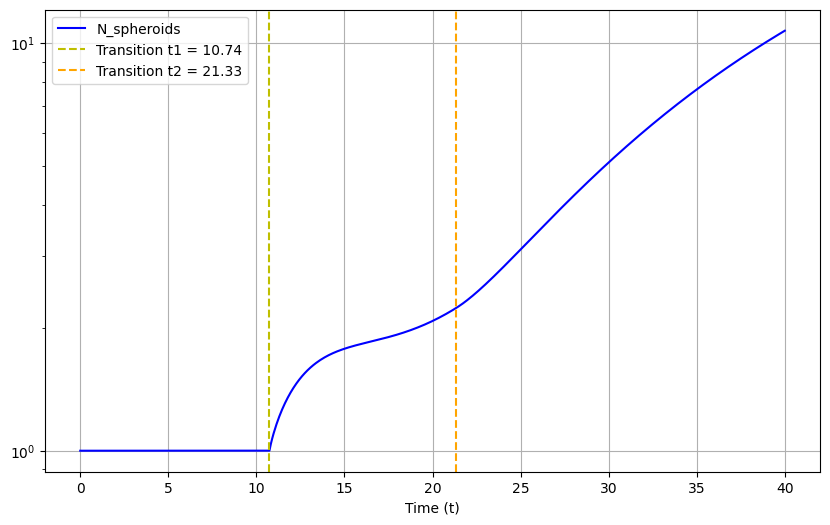

In [28]:
tt = np.linspace(0, 40, 500)

r0_cm = pie_r0(tt) *1e2  #cm
print(pie_r0(transition_cas) *1e2)  # cm
N_spheroids = piecewise_function_mt(tt, w_opt, Mt_v_opt, t2_opt) / ((r0_cm**3) *4 * np.pi/3)

plt.figure(figsize=(10, 6))
plt.plot(tt, N_spheroids, 'b-', label='N_spheroids')
plt.axvline(transition_cas, color='y', linestyle='--', label=f'Transition t1 = {transition_cas:.2f}')
plt.axvline(t2_opt, color='Orange', linestyle='--', label=f'Transition t2 = {t2_opt:.2f}')
plt.xlabel('Time (t)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

r0_test (m): [0.00019939 0.00023743 0.00026693 0.00030641 0.00173498]
r0_test (µm): [ 199.39486951  237.42508242  266.92976845  306.41079065 1734.98427171]

Time = 10 days
  Tumor radius: 1.99e-04 m
  Necrotic radius r_n: 0.00e+00 m
  Viable rim radius r_c: 1.99e-04 m

Time = 11 days
  Tumor radius: 2.37e-04 m
  Necrotic radius r_n: 2.74e-05 m
  Viable rim radius r_c: 2.10e-04 m

Time = 12 days
  Tumor radius: 2.67e-04 m
  Necrotic radius r_n: 8.47e-05 m
  Viable rim radius r_c: 1.82e-04 m

Time = 13 days
  Tumor radius: 3.06e-04 m
  Necrotic radius r_n: 1.37e-04 m
  Viable rim radius r_c: 1.69e-04 m

Time = 30 days
  Tumor radius: 1.73e-03 m
  Necrotic radius r_n: 1.60e-03 m
  Viable rim radius r_c: 1.38e-04 m


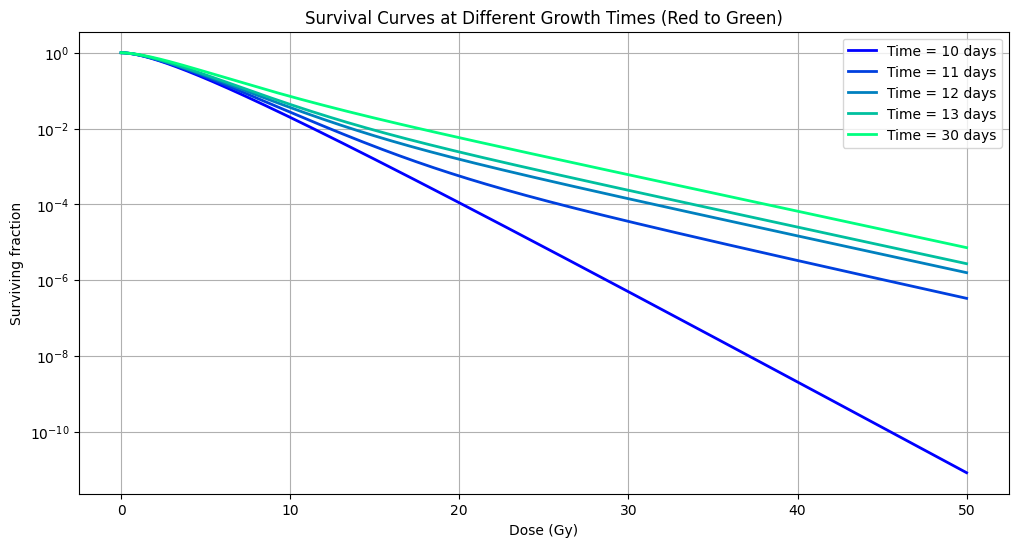

In [29]:
import numpy as np
import matplotlib.pyplot as plt

time_l = [10,11,12,13,30]

r0_test = pie_r0(time_l)
print("r0_test (m):", r0_test)
print("r0_test (µm):", r0_test * 1e6) 

def calculate_rn_rc(r_o, r_l):
    if r_o <= r_l:
        return 0.0, r_o 
    x = np.arccos(1 - 2 * (r_l**2) / (r_o**2)) / 3 - 2 * np.pi / 3
    r_c = r_o * (0.5 + np.cos(x))
    r_n = r_o - r_c
    return r_n, r_c

p = 0.02
q = 0.6067006790484573
oxygen_half = 8.022339
OER_0 = 2.75375
x = np.linspace(0, 50, 1000) 

def survival_100(x, oxygen):
    OER = (oxygen + oxygen_half) / (oxygen + oxygen_half / OER_0)
    S1 = (1 + (q * x / OER))
    S2 = np.exp(-x * (p + q) / OER)
    return S1 * S2

plt.figure(figsize=(12, 6))
plt.yscale('log')
plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving fraction')
plt.grid(True)

colors = plt.cm.winter(np.linspace(0, 1, len(time_l)))

for i, t in enumerate(time_l):
    r0 = r0_test[i]
    r_n, r_c = calculate_rn_rc(r0, r_l)
    print(f"\nTime = {t} days")
    print(f"  Tumor radius: {r0:.2e} m")
    print(f"  Necrotic radius r_n: {r_n:.2e} m")
    print(f"  Viable rim radius r_c: {r_c:.2e} m")

    def phi(p):
        return r0**2 + (2 * r_n**3) / r0 + (6 * D * (p - p0)) / (V * a)

    def rp(p):
        phi_val = phi(p)
        with np.errstate(invalid='ignore'):
            inner_sqrt = np.sqrt((3 * r_n**2 / phi_val)**3)
            acos_arg = -inner_sqrt
            result = 2 * np.sqrt(phi_val / 3) * np.cos((1/3) * np.arccos(acos_arg))
            return result

    p_values = np.linspace(0, 100, 100000)
    rp_values = rp(p_values)

    positive_indices = rp_values > 0
    rp_pos = rp_values[positive_indices]
    p_pos = p_values[positive_indices]

    if len(rp_pos) > 0:
        min_index = np.argmin(rp_pos)
        p_min_nonzero = p_pos[min_index]
        rp_min_nonzero = rp_pos[min_index]
    else:
        p_min_nonzero = 0
        rp_min_nonzero = 0
    p_values = np.linspace(max(p_min_nonzero, 1e-10), 100, 100000)  # 使用1e-10代替0
    rp_values = rp(p_values)
    V_total = (4/3) * np.pi * (r0**3)
    V_viable_list = []
    V_total_v = (4/3) * np.pi * ((r0**3)-r_n**3)

    if t<=transition_cas :
        for j in range(len(p_values)):
            if j == 0:
                V_viable = (4/3) * np.pi * (rp_values[j]**3) / V_total
            else:
                delta_V = (4/3) * np.pi * (rp_values[j]**3 - rp_values[j-1]**3)
                V_viable = delta_V / V_total
            V_viable_list.append(V_viable)
    
        V_viable_array = np.array(V_viable_list)
        p_values_used = p_values
        s_sum = np.zeros_like(x)
        for j in range(len(p_values_used)):
            oxygen_j = p_values_used[j]
            ad = survival_100(x, oxygen_j)
            s_sum += ad * V_viable_array[j]
        plt.plot(x, s_sum, '-', color=colors[i], label=f'Time = {t} days', linewidth=2)    

    else :
        for j in range(len(p_values)):
            if j == 0:
                continue
            else:
                delta_V = (4/3) * np.pi * (rp_values[j]**3 - rp_values[j-1]**3)
                V_viable = delta_V / V_total_v
                V_viable_list.append(V_viable)
    
        V_viable_array = np.array(V_viable_list)
        p_values_used = p_values[1:]  
        s_sum = np.zeros_like(x)
        for j in range(len(p_values_used)):
            oxygen_j = p_values_used[j]
            ad = survival_100(x, oxygen_j)
            s_sum += ad * V_viable_array[j]
        plt.plot(x, s_sum, '-', color=colors[i], label=f'Time = {t} days', linewidth=2)

plt.legend()
plt.title('Survival Curves at Different Growth Times (Red to Green)')
plt.show()

r0_test (m): [0.00083845]
r0_test (µm): [838.45275019]

Time = 20 days
  Tumor radius: 8.38e-04 m
  Necrotic radius r_n: 6.96e-04 m
  Viable rim radius r_c: 1.43e-04 m
p_values[0] = 0.0


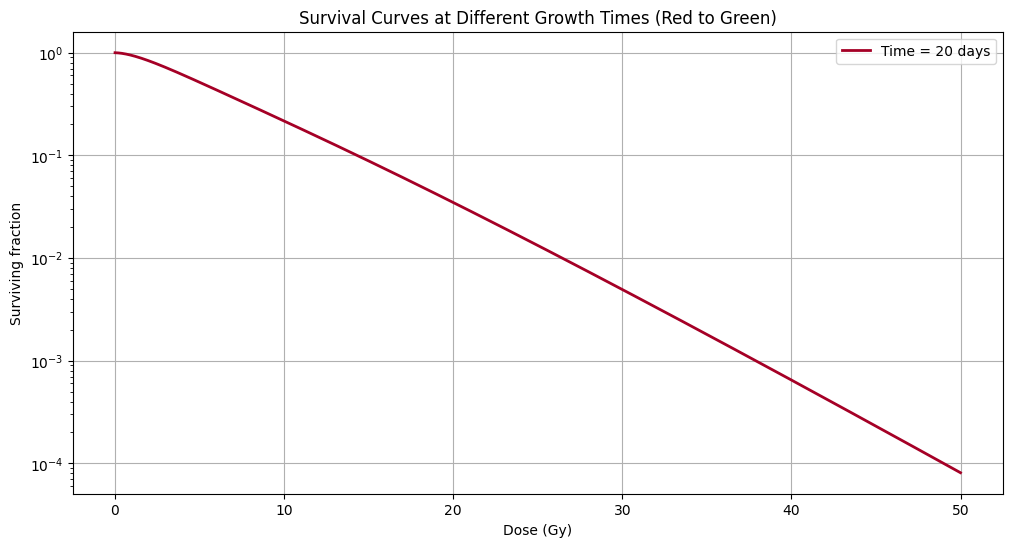

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 定义时间点(单位：天)
time_l = [20]

r0_test = pie_r0(time_l)
print("r0_test (m):", r0_test)
print("r0_test (µm):", r0_test * 1e6)  # 转换为 µm

# 计算坏死区和存活区半径
def calculate_rn_rc(r_o, r_l):
    if r_o <= r_l:
        return 0.0, r_o 
    x = np.arccos(1 - 2 * (r_l**2) / (r_o**2)) / 3 - 2 * np.pi / 3
    r_c = r_o * (0.5 + np.cos(x))
    r_n = r_o - r_c
    return r_n, r_c

# 定义放射生物学参数
p = 0.02
q = 0.6067006790484573
oxygen_half = 8.022339
OER_0 = 2.75375
x = np.linspace(0, 50, 1000)  # 剂量范围 (Gy)

# 生存分数计算函数
def survival_100(x, oxygen):
    OER = (oxygen + oxygen_half) / (oxygen + oxygen_half / OER_0)
    S1 = (1 + (q * x / OER))
    S2 = np.exp(-x * (p + q) / OER)
    return S1 * S2

# 初始化绘图
plt.figure(figsize=(12, 6))
plt.yscale('log')
plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving fraction')
plt.grid(True)

# 定义颜色渐变(从红到绿)
colors = plt.cm.RdYlGn(np.linspace(0, 1, len(time_l)))

for i, t in enumerate(time_l):
    r0 = r0_test[i]
    r_n, r_c = calculate_rn_rc(r0, r_l)
    print(f"\nTime = {t} days")
    print(f"  Tumor radius: {r0:.2e} m")
    print(f"  Necrotic radius r_n: {r_n:.2e} m")
    print(f"  Viable rim radius r_c: {r_c:.2e} m")

    def phi(p):
        return r0**2 + (2 * r_n**3) / r0 + (6 * D * (p - p0)) / (V * a)

    def rp(p):
        phi_val = phi(p)
        with np.errstate(invalid='ignore'):
            inner_sqrt = np.sqrt((3 * r_n**2 / phi_val)**3)
            acos_arg = -inner_sqrt
            result = 2 * np.sqrt(phi_val / 3) * np.cos((1/3) * np.arccos(acos_arg))
            return result

    # 计算氧分压和对应半径
    p_values = np.linspace(0, 100, 100000)
    rp_values = rp(p_values)

    # 筛选正值
    positive_indices = rp_values > 0
    rp_pos = rp_values[positive_indices]
    p_pos = p_values[positive_indices]

    # 找到最小非零p值
    if len(rp_pos) > 0:
        min_index = np.argmin(rp_pos)
        p_min_nonzero = p_pos[min_index]
        rp_min_nonzero = rp_pos[min_index]
    else:
        p_min_nonzero = 0
        rp_min_nonzero = 0

    # 重新计算有效范围内的值
    p_values = np.linspace(max(p_min_nonzero, 0), 100, 100000)
    rp_values = rp(p_values)
    print(f"p_values[0] = {p_values[0]}")    
    # 计算总体积和存活体积分数
    V_total = (4/3) * np.pi * (r0**3)
    V_viable_list = []
    
    # 计算每个p值对应的存活体积分数
    for j in range(len(p_values)):
        if j == 0:
            # 第一个点直接用其体积计算分数
            V_viable = (4/3) * np.pi * (rp_values[j]**3) / V_total
        else:
            # 后续点计算体积增量对应的分数
            delta_V = (4/3) * np.pi * (rp_values[j]**3 - rp_values[j-1]**3)
            V_viable = delta_V / V_total
        V_viable_list.append(V_viable)
    
    V_viable_array = np.array(V_viable_list)

    # 计算加权生存分数
    s_sum = np.zeros_like(x)
    for j in range(len(p_values)-1):
        oxygen_j = p_values[j+1]  # 使用j+1对应的氧分压
        ad = survival_100(x, oxygen_j)
        s_sum += ad * V_viable_array[j]  # 使用j对应的体积分数

    # 绘制生存曲线
    plt.plot(x, s_sum, '-', color=colors[i], label=f'Time = {t} days', linewidth=2)

plt.legend()
plt.title('Survival Curves at Different Growth Times (Red to Green)')
plt.show()

21.3265306122449
476.0731978743865
Necrotic radius r_n: 3.24e-04 m
Viable rim radius r_c: 1.52e-04 m


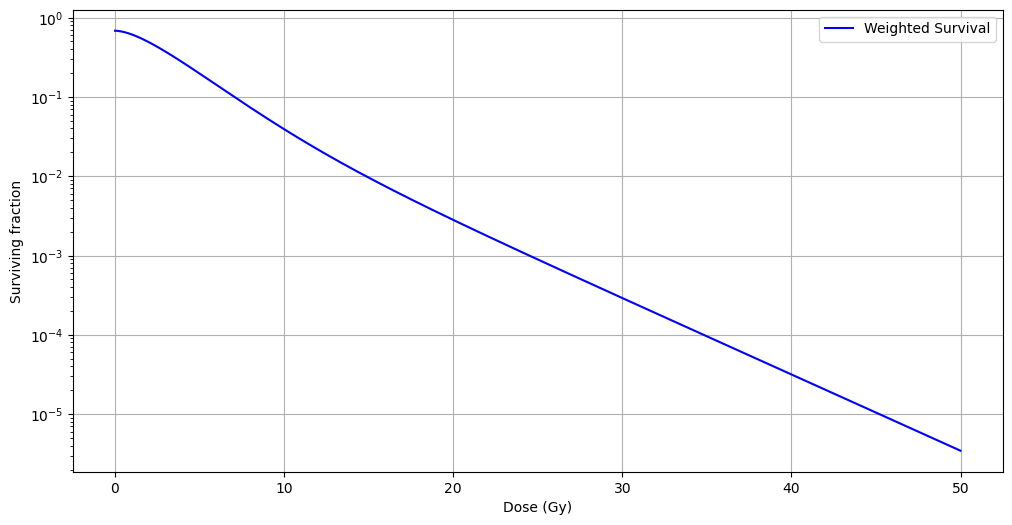

0.0


In [31]:
r0_test = pie_r0(16)
print(t2)
print(r0_test*1e6) #miu m
def calculate_rn_rc(r_o, r_l):
    if r_o <= r_l:
        return 0.0, r_o 
    x = np.arccos(1 - 2 * (r_l**2) / (r_o**2)) / 3 - 2 * np.pi / 3
    r_c = r_o * (0.5 + np.cos(x))
    r_n = r_o - r_c
    return r_n, r_c

r_n, r_c = calculate_rn_rc(r0_test, r_l)
print(f"Necrotic radius r_n: {r_n:.2e} m")
print(f"Viable rim radius r_c: {r_c:.2e} m")
def phi(p):
    return r0_test**2 + (2 * r_n**3) / r0_test + (6 * D * (p - p0)) / (V * a)
def rp(p):
    phi_val = phi(p)
    with np.errstate(invalid='ignore'):
        inner_sqrt = np.sqrt((3 * r_n**2 / phi_val)**3)
        acos_arg = -inner_sqrt
        result = 2 * np.sqrt(phi_val / 3) * np.cos((1/3) * np.arccos(acos_arg))
        return result

p_values = np.linspace(0, 100, 100000)
rp_values = rp(p_values)

positive_indices = rp_values > 0
rp_pos = rp_values[positive_indices]
p_pos = p_values[positive_indices]

min_index = np.argmin(rp_pos)
p_min_nonzero = p_pos[min_index]
rp_min_nonzero = rp_pos[min_index]


p_values = np.linspace(p_min_nonzero, 100, 100000)
rp_values = rp(p_values)
V_total = (4/3) * np.pi * (r0_test**3)

V_viable_list = [] 
for i in range(len(p_values)):
    if i == 0:      #0:  
        V_viable = (4/3) * np.pi * (rp_values[i]**3) / V_total
    else:
        v_s = (4/3) * np.pi * (rp_values[i-1]**3)
        v_l = (4/3) * np.pi * (rp_values[i]**3)
        V_viable = (v_l - v_s) / V_total
    V_viable_list.append(V_viable)
V_viable_array = np.array(V_viable_list)

V_viable_list = []
for i in range(len(p_values)):
    if i == 0:
        V_viable = (4/3) * np.pi * (rp_values[i]**3) / V_total
    else:
        v_prev = (4/3) * np.pi * (rp_values[i-1]**3)
        v_now = (4/3) * np.pi * (rp_values[i]**3)
        V_viable = (v_now - v_prev) / V_total
    V_viable_list.append(V_viable)

V_viable_array = np.array(V_viable_list)

p = 0.02
q = 0.6067006790484573
oxygen_half = 8.022339
OER_0 = 2.75375
x = np.linspace(0, 50, 1000)

def survival_100(x, oxygen):
    OER = (oxygen + oxygen_half) / (oxygen + oxygen_half / OER_0)
    S1 = (1 + (q * x / OER))
    S2 = np.exp(-x * (p + q) / OER)
    return S1 * S2

s_sum = np.zeros_like(x)

for i in range(len(p_values)-1):
    oxygen_i = p_values[i+1]
    ad = survival_100(x, oxygen_i)
    s_sum += ad * V_viable_array[i+1]

plt.figure(figsize=(12, 6))
plt.yscale('log')
plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving fraction')
plt.plot(x, s_sum, '-', color='blue', label='Weighted Survival')
plt.legend()
plt.grid(True)
plt.show() 
print(p_values[0])

In [32]:
time_l = [5,15,25,35]
r0_test = pie_r0(time_l)
print(t2)
print(r0_test*1e6) #miu m
def calculate_rn_rc(r_o, r_l):
    if r_o <= r_l:
        return 0.0, r_o 
    x = np.arccos(1 - 2 * (r_l**2) / (r_o**2)) / 3 - 2 * np.pi / 3
    r_c = r_o * (0.5 + np.cos(x))
    r_n = r_o - r_c
    return r_n, r_c

r_n, r_c = calculate_rn_rc(r0_test, r_l)
print(f"Necrotic radius r_n: {r_n:.2e} m")
print(f"Viable rim radius r_c: {r_c:.2e} m")
def phi(p):
    return r0_test**2 + (2 * r_n**3) / r0_test + (6 * D * (p - p0)) / (V * a)
def rp(p):
    phi_val = phi(p)
    with np.errstate(invalid='ignore'):
        inner_sqrt = np.sqrt((3 * r_n**2 / phi_val)**3)
        acos_arg = -inner_sqrt
        result = 2 * np.sqrt(phi_val / 3) * np.cos((1/3) * np.arccos(acos_arg))
        return result

p_values = np.linspace(0, 100, 100000)
rp_values = rp(p_values)

positive_indices = rp_values > 0
rp_pos = rp_values[positive_indices]
p_pos = p_values[positive_indices]

min_index = np.argmin(rp_pos)
p_min_nonzero = p_pos[min_index]
rp_min_nonzero = rp_pos[min_index]


p_values = np.linspace(p_min_nonzero, 100, 100000)
rp_values = rp(p_values)
V_total = (4/3) * np.pi * (r0_test**3)

V_viable_list = [] 
for i in range(len(p_values)):
    if i == 0:      #0:  
        V_viable = (4/3) * np.pi * (rp_values[i]**3) / V_total
    else:
        v_s = (4/3) * np.pi * (rp_values[i-1]**3)
        v_l = (4/3) * np.pi * (rp_values[i]**3)
        V_viable = (v_l - v_s) / V_total
    V_viable_list.append(V_viable)
V_viable_array = np.array(V_viable_list)

V_viable_list = []
for i in range(len(p_values)):
    if i == 0:
        V_viable = (4/3) * np.pi * (rp_values[i]**3) / V_total
    else:
        v_prev = (4/3) * np.pi * (rp_values[i-1]**3)
        v_now = (4/3) * np.pi * (rp_values[i]**3)
        V_viable = (v_now - v_prev) / V_total
    V_viable_list.append(V_viable)

V_viable_array = np.array(V_viable_list)

p = 0.02
q = 0.6067006790484573
oxygen_half = 8.022339
OER_0 = 2.75375
x = np.linspace(0, 50, 1000)

def survival_100(x, oxygen):
    OER = (oxygen + oxygen_half) / (oxygen + oxygen_half / OER_0)
    S1 = (1 + (q * x / OER))
    S2 = np.exp(-x * (p + q) / OER)
    return S1 * S2

s_sum = np.zeros_like(x)

for i in range(len(p_values)-1):
    oxygen_i = p_values[i+1]
    ad = survival_100(x, oxygen_i)
    s_sum += ad * V_viable_array[i]

plt.figure(figsize=(12, 6))
plt.yscale('log')
plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving fraction')
plt.plot(x, s_sum, '-', color='blue', label='Weighted Survival')
plt.legend()
plt.grid(True)
plt.show() 
print(p_values[0])

21.3265306122449
[  69.66288587  410.76432895 1393.53757565 1952.94318535]


<class 'ValueError'>: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Matplotlib is building the font cache; this may take a moment.


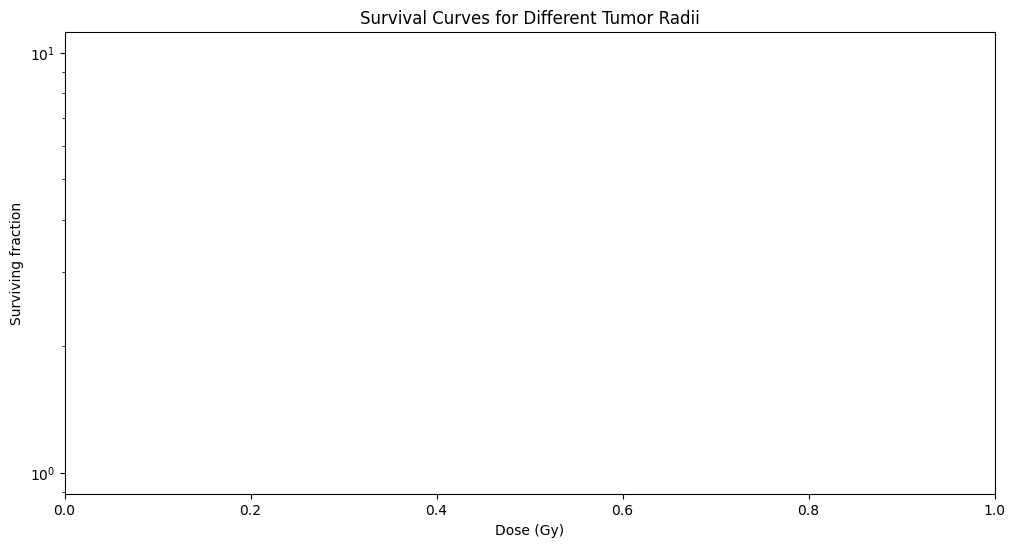

<class 'NameError'>: name 'r_l' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.02
q = 0.6067006790484573
oxygen_half = 8.022339
OER_0 = 2.75375

def pie_r0(t):
    # 这里应该是计算r0的函数，假设返回一个值
    return t * 1e-6  # 示例函数，实际应根据你的需求修改

def calculate_rn_rc(r_o, r_l):
    if r_o <= r_l:
        return 0.0, r_o 
    x = np.arccos(1 - 2 * (r_l**2) / (r_o**2)) / 3 - 2 * np.pi / 3
    r_c = r_o * (0.5 + np.cos(x))
    r_n = r_o - r_c
    return r_n, r_c

def phi(p, r0_test, r_n):
    return r0_test**2 + (2 * r_n**3) / r0_test + (6 * D * (p - p0)) / (V * a)

def rp(p, r0_test, r_n):
    phi_val = phi(p, r0_test, r_n)
    with np.errstate(invalid='ignore'):
        inner_sqrt = np.sqrt((3 * r_n**2 / phi_val)**3)
        acos_arg = -inner_sqrt
        result = 2 * np.sqrt(phi_val / 3) * np.cos((1/3) * np.arccos(acos_arg))
        return result

def survival_100(x, oxygen):
    OER = (oxygen + oxygen_half) / (oxygen + oxygen_half / OER_0)
    S1 = (1 + (q * x / OER))
    S2 = np.exp(-x * (p + q) / OER)
    return S1 * S2

# 定义要测试的r0_test值
r0_test_values = [pie_r0(t) for t in [17, 10, 20, 35, 40]]  # 测试5个不同的时间点

plt.figure(figsize=(12, 6))
plt.yscale('log')
plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving fraction')
plt.title('Survival Curves for Different Tumor Radii')

for r0_test in r0_test_values:
    r_n, r_c = calculate_rn_rc(r0_test, r_l)
    
    # 计算rp的最小非零值对应的p
    p_values_init = np.linspace(0, 100, 100000)
    rp_values_init = rp(p_values_init, r0_test, r_n)
    
    positive_indices = rp_values_init > 0
    rp_pos = rp_values_init[positive_indices]
    p_pos = p_values_init[positive_indices]
    
    min_index = np.argmin(rp_pos)
    p_min_nonzero = p_pos[min_index]
    
    # 重新定义p_values范围
    p_values = np.linspace(p_min_nonzero, 100, 100000)
    rp_values = rp(p_values, r0_test, r_n)
    
    V_total = (4/3) * np.pi * (r0_test**3)
    V_viable_list = []
    
    # 计算每个p值对应的V_viable
    for i in range(len(p_values)):
        if i == 0:
            V_viable = (4/3) * np.pi * (rp_values[i]**3) / V_total
        else:
            v_prev = (4/3) * np.pi * (rp_values[i-1]**3)
            v_now = (4/3) * np.pi * (rp_values[i]**3)
            V_viable = (v_now - v_prev) / V_total
        V_viable_list.append(V_viable)
    
    V_viable_array = np.array(V_viable_list)
    
    # 计算生存曲线
    x = np.linspace(0, 50, 1000)
    s_sum = np.zeros_like(x)
    
    for i in range(len(p_values)-1):
        oxygen_i = p_values[i+1]
        ad = survival_100(x, oxygen_i)
        s_sum += ad * V_viable_array[i]
    
    # 绘制当前r0_test对应的生存曲线
    plt.plot(x, s_sum, '-', label=f'r0 = {r0_test:.2e} m (t={[17,10,20,35,40][r0_test_values.index(r0_test)]} days)')

plt.legend()
plt.grid(True)
plt.show()

In [2]:
r0_test = pie_r0(40)
print(t2)
print(r0_test*1e6) #miu m
def calculate_rn_rc(r_o, r_l):
    if r_o <= r_l:
        return 0.0, r_o 
    x = np.arccos(1 - 2 * (r_l**2) / (r_o**2)) / 3 - 2 * np.pi / 3
    r_c = r_o * (0.5 + np.cos(x))
    r_n = r_o - r_c
    return r_n, r_c

r_n, r_c = calculate_rn_rc(r0_test, r_l)
print(f"Necrotic radius r_n: {r_n:.2e} m")
print(f"Viable rim radius r_c: {r_c:.2e} m")
def phi(p):
    return r0_test**2 + (2 * r_n**3) / r0_test + (6 * D * (p - p0)) / (V * a)
def rp(p):
    phi_val = phi(p)
    with np.errstate(invalid='ignore'):
        inner_sqrt = np.sqrt((3 * r_n**2 / phi_val)**3)
        acos_arg = -inner_sqrt
        result = 2 * np.sqrt(phi_val / 3) * np.cos((1/3) * np.arccos(acos_arg))
        return result

p_values = np.linspace(0, 100, 100000)
rp_values = rp(p_values)

positive_indices = rp_values > 0
rp_pos = rp_values[positive_indices]
p_pos = p_values[positive_indices]

min_index = np.argmin(rp_pos)
p_min_nonzero = p_pos[min_index]
rp_min_nonzero = rp_pos[min_index]


p_values = np.linspace(p_min_nonzero, 100, 100000)
rp_values = rp(p_values)
V_total = (4/3) * np.pi * (r0_test**3)

V_viable_list = [] 
for i in range(len(p_values)):
    if i == 0:      #0:  
        V_viable = (4/3) * np.pi * (rp_values[i]**3) / V_total
    else:
        v_s = (4/3) * np.pi * (rp_values[i-1]**3)
        v_l = (4/3) * np.pi * (rp_values[i]**3)
        V_viable = (v_l - v_s) / V_total
    V_viable_list.append(V_viable)
V_viable_array = np.array(V_viable_list)

V_viable_list = []
for i in range(len(p_values)):
    if i == 0:
        V_viable = (4/3) * np.pi * (rp_values[i]**3) / V_total
    else:
        v_prev = (4/3) * np.pi * (rp_values[i-1]**3)
        v_now = (4/3) * np.pi * (rp_values[i]**3)
        V_viable = (v_now - v_prev) / V_total
    V_viable_list.append(V_viable)

V_viable_array = np.array(V_viable_list)

p = 0.02
q = 0.6067006790484573
oxygen_half = 8.022339
OER_0 = 2.75375
x = np.linspace(0, 50, 1000)

def survival_100(x, oxygen):
    OER = (oxygen + oxygen_half) / (oxygen + oxygen_half / OER_0)
    S1 = (1 + (q * x / OER))
    S2 = np.exp(-x * (p + q) / OER)
    return S1 * S2

s_sum = np.zeros_like(x)

for i in range(len(p_values)-1):
    oxygen_i = p_values[i+1]
    ad = survival_100(x, oxygen_i)
    s_sum += ad * V_viable_array[i]

plt.figure(figsize=(12, 6))
plt.yscale('log')
plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving fraction')
plt.plot(x, s_sum, '-', color='blue', label='Weighted Survival')
plt.legend()
plt.grid(True)
plt.show() 
print(p_values[0])

<class 'NameError'>: name 't2' is not defined

In [3]:
r0_test = pie_r0(10)
print(t2)
print(r0_test*1e6) #miu m
def calculate_rn_rc(r_o, r_l):
    if r_o <= r_l:
        return 0.0, r_o 
    x = np.arccos(1 - 2 * (r_l**2) / (r_o**2)) / 3 - 2 * np.pi / 3
    r_c = r_o * (0.5 + np.cos(x))
    r_n = r_o - r_c
    return r_n, r_c

r_n, r_c = calculate_rn_rc(r0_test, r_l)
print(f"Necrotic radius r_n: {r_n:.2e} m")
print(f"Viable rim radius r_c: {r_c:.2e} m")

<class 'NameError'>: name 't2' is not defined

In [4]:
def phi(p):
    return r0_test**2 + (2 * r_n**3) / r0_test + (6 * D * (p - p0)) / (V * a)
def rp(p):
    phi_val = phi(p)
    with np.errstate(invalid='ignore'):
        inner_sqrt = np.sqrt((3 * r_n**2 / phi_val)**3)
        acos_arg = -inner_sqrt
        result = 2 * np.sqrt(phi_val / 3) * np.cos((1/3) * np.arccos(acos_arg))
        return result

p_values = np.linspace(0, 100, 100000)
rp_values = rp(p_values)

plt.figure(figsize=(8, 5))
plt.plot(p_values, rp_values, color='orange', label=r'$r_p(p)$')
plt.xlabel(r'$p$', fontsize=12)
plt.ylabel(r'$r_p$', fontsize=12)
plt.title(r'Plot of $r_p$ as a function of $p$', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<class 'NameError'>: name 'r_n' is not defined

In [5]:
positive_indices = rp_values > 0
rp_pos = rp_values[positive_indices]
p_pos = p_values[positive_indices]

min_index = np.argmin(rp_pos)
p_min_nonzero = p_pos[min_index]
rp_min_nonzero = rp_pos[min_index]

print(f"r_p  {rp_min_nonzero}，minimiza p = {p_min_nonzero}")
print(rp_values[0])

<class 'NameError'>: name 'rp_values' is not defined

In [6]:
p_values = np.linspace(p_min_nonzero, 100, 100000)
rp_values = rp(p_values)
V_total = (4/3) * np.pi * (r0_test**3)

V_viable_list = [] 
for i in range(len(p_values)):
    if i == 0:      #0:  
        V_viable = (4/3) * np.pi * (rp_values[i]**3) / V_total
    else:
        v_s = (4/3) * np.pi * (rp_values[i-1]**3)
        v_l = (4/3) * np.pi * (rp_values[i]**3)
        V_viable = (v_l - v_s) / V_total
    V_viable_list.append(V_viable)
V_viable_array = np.array(V_viable_list)
plt.figure(figsize=(10, 6))
plt.plot(p_values, V_viable_array, label="Cell Ratio (V_viable/V_total)")
plt.xlabel("p")
plt.ylabel("Cell Ratio")
plt.title("Cell Ratio vs p")
plt.grid(True)
plt.legend()
plt.show()

print(sum(V_viable_array))
print(V_viable_array[0])
print(p_values[-1])
print("rp(100) =", rp_values[-1])
print("r0_test =", r0_test)
print(p_values[0], p_values[-1]) 

<class 'NameError'>: name 'p_min_nonzero' is not defined

In [7]:
print(p_values[0])

0.0


In [ ]:
V_viable_list = []
for i in range(len(p_values)):
    if i == 0:
        V_viable = (4/3) * np.pi * (rp_values[i]**3) / V_total
    else:
        v_prev = (4/3) * np.pi * (rp_values[i-1]**3)
        v_now = (4/3) * np.pi * (rp_values[i]**3)
        V_viable = (v_now - v_prev) / V_total
    V_viable_list.append(V_viable)

V_viable_array = np.array(V_viable_list)

plt.figure(figsize=(12, 6))
plt.bar(p_values, V_viable_array, width=0.3, color='skyblue', label="Cell Volume Ratio")
plt.xlabel("p")
plt.ylabel("ΔViable Volume Ratio")
plt.title("Viable Cell Volume Contribution per p Interval")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
p = 0.02
q = 0.6067006790484573
oxygen_half = 8.022339
OER_0 = 2.75375
x = np.linspace(0, 50, 1000)

def survival_100(x, oxygen):
    OER = (oxygen + oxygen_half) / (oxygen + oxygen_half / OER_0)
    S1 = (1 + (q * x / OER))
    S2 = np.exp(-x * (p + q) / OER)
    return S1 * S2

s_sum = np.zeros_like(x)

for i in range(len(p_values)-1):
    oxygen_i = p_values[i+1]
    ad = survival_100(x, oxygen_i)
    s_sum += ad * V_viable_array[i]

plt.figure(figsize=(12, 6))
plt.yscale('log')
plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving fraction')
plt.plot(x, s_sum, '-', color='blue', label='Weighted Survival')
plt.legend()
plt.grid(True)
plt.show() 
print(p_values[0])

In [ ]:
print(p_values[1])

In [ ]:
d_values = [0, 30, 40, 100]
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(12, 6))
plt.yscale('log')
plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving fraction')

for d, color in zip(d_values, colors):
    survival = survival_100(x, d)
    plt.plot(x, survival, color=color, label=f'd={d}')

plt.legend()
plt.grid(True)
plt.title('Survival curves for different d values')
plt.show()

0.0


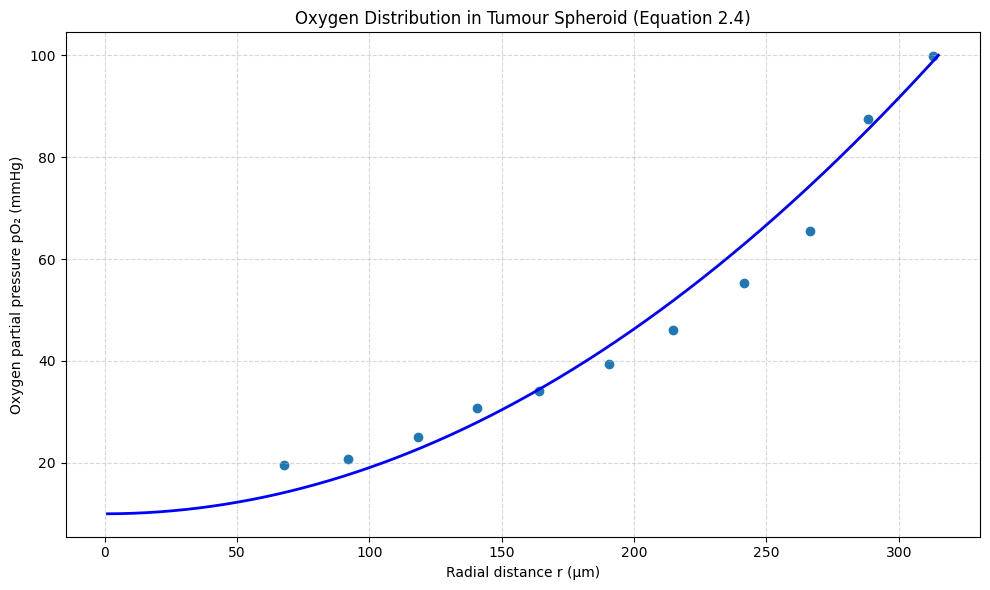

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

D = 2.0e-9
p0 = 100
a_0 = 3.589852090342636e-07 # 3.604e-07
V = 3.0318e7
a = a_0
r_l = np.sqrt(6 * D * p0 / (a * V))
r_o = 315e-6#625e-6 #

def calculate_rn_rc(r_o, r_l):
    if r_o <= r_l:
        return 0.0, r_o  
    x = np.arccos(1 - 2 * (r_l**2) / (r_o**2)) /3 - 2 * np.pi / 3
    r_c = r_o * (0.5 + np.cos(x))
    r_n = r_o - r_c
    return r_n, r_c

r_n, r_c = calculate_rn_rc(r_o, r_l)

def p_r(r, r_o, r_n, p0, a, V, D):
    if r <= r_n:
        return 0.0
    term = r**2 - r_o**2 + 2 * r_n**3 * (1/r - 1/r_o)
    return p0 + (a * V) / (6 * D) * term

r_values = np.linspace(1e-6, r_o, 100000)
p_values = [p_r(r, r_o, r_n, p0, a, V, D) if r > r_n else 0 for r in r_values]

print(r_n* 1e6)

data = pd.read_csv('Influence of Ionizing_fig1.csv')
t = data['x'].values
d = data['Curve1'].values
ro = 310e-6
r_data = ro - t.astype(float) * 1e-6
p_data = d.astype(float)


plt.figure(figsize=(10, 6))
plt.scatter(r_data * 1e6, p_data, label='Experimental data')
plt.plot(r_values * 1e6, p_values, 'b-', linewidth=2)

plt.xlabel('Radial distance r (μm)')
plt.ylabel('Oxygen partial pressure pO₂ (mmHg)')
plt.title('Oxygen Distribution in Tumour Spheroid (Equation 2.4)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [14]:
r_l = np.sqrt(6 * D * p0 / (a * V))
m_cri = 4 * np.pi / 3 * (r_l ** 3)
print(f"r_l: {r_l:.50f} m")
print(f"m_cri: {m_cri*1e12:.50f} mm^3 * 1e-3")

r_l: 0.00033204891935354038847577617943329642002936452627 m
m_cri: 153.35389917477229460018861573189496994018554687500000 mm^3 * 1e-3


In [39]:
print(p_r(60e-6, 260e-6, r_n, p0, a, V, D))

24.99988264938966


In [ ]:
from scipy.interpolate import interp1d

def r_0(t):
    return r_l /np.sqrt(3 - 2*t - 3*((1-t)**(2/3)))

R_values = np.linspace(r_l * 0.001, r_l * 10, 10000)
k_values = np.array([ratio(R) for R in R_values])

interp_func = interp1d(k_values, R_values, kind='linear', fill_value='extrapolate')

target_k = 1/ratio_test
print(target_k)
R_target = interp_func(target_k)

print(f"For mt-mv ratio k = {target_k:.4f}, interpolated R = {R_target:.4f} cm")

mass_sub = 4 * np.pi / 3 * (R_target**3)
print(f"mass for small spheriods: {mass_sub:.10f} ")
print(f"rl: {r_l:.10f} ")
print(f"R_target: {R_target:.10f} ")


# 计算坏死核心和活细胞层
def calculate_rn_rc(r_o, r_l):
    if r_o <= r_l:
        return 0.0, r_o  # 无坏死核心
    x = np.arccos(1 - 2 * (r_l**2) / (r_o**2)) - 2 * np.pi / 3
    r_c = r_o * (0.5 + np.cos(x))
    r_n = r_o - r_c
    return r_n, r_c

# 氧分压分布函数
def p_r(r, r_o, r_n, p0, a, V, D):
    if r <= r_n:
        return 0.0
    term = r**2 - r_o**2 + 2 * r_n**3 * (1/r - 1/r_o)
    return p0 + (a * V) / (6 * D) * term

# 设置肿瘤半径
#R_target = 200e-6  # 200 μm
r_n, r_c = calculate_rn_rc(R_target, r_l)

# 计算径向氧分压分布
r_values = np.linspace(0, R_target, 100000)  # 避免r=0
pO2_values = [p_r(r, R_target, r_n, p0, a, V, D) for r in r_values]

pO2_ranges = np.linspace(0, p0, 21)  # 20个区间
volumes = []
range_boundaries = []

for i in range(len(pO2_ranges)-1):
    lower_pO2 = pO2_ranges[i]
    upper_pO2 = pO2_ranges[i+1]
    
    # 找到对应半径范围
    mask = (pO2_values >= lower_pO2) & (pO2_values < upper_pO2)
    selected_r = r_values[mask]
    
    if len(selected_r) > 1:
        # 计算壳层体积 (4/3π(r2³ - r1³))
        r_min = selected_r[0]
        r_max = selected_r[-1]
        volume = (4/3) * np.pi * (r_max**3 - r_min**3)
    else:
        volume = 0
    
    volumes.append(volume)
    range_boundaries.append(f"{lower_pO2:.1f}-{upper_pO2:.1f}")

volumes = np.array(volumes)

# 绘制氧分压-体积关系曲线
plt.figure(figsize=(14, 6))

# 曲线图
plt.subplot(121)
plt.plot(pO2_ranges[:-1], volumes, 'bo-', markersize=5)
plt.xlabel('Oxygen Partial Pressure Range (mmHg)')
plt.ylabel('Volume (m³)')
plt.title('Volume Distribution by pO₂ Range')
plt.grid(True, linestyle='--', alpha=0.5)

# 柱状图
plt.subplot(122)
plt.bar(range(len(volumes)), volumes, tick_label=range_boundaries)
plt.xticks(rotation=90)
plt.xlabel('pO₂ Range (mmHg)')
plt.ylabel('Volume (m³)')
plt.title('Volume per pO₂ Interval')

plt.tight_layout()
plt.show()

print("volume for different oxygen intervals：")
for i in range(len(pO2_ranges)-1):
    print(f"{pO2_ranges[i]:.1f}-{pO2_ranges[i+1]:.1f} mmHg: {volumes[i]:.2e} m³")

total_cells = np.sum(volumes * cell_density)
print(f"\n: {total_cells:.2e}")

In [ ]:
# 计算每层体积占总肿瘤体积的比例（按 r^3 估算）
volume_total = r_o**3
volume_ratios = (r_values**3) / volume_total

# 初始化计数
anoxic_volume = 0
hypoxic_volume = 0
normoxic_volume = 0

for i in range(1, len(r_values)):
    dv = volume_ratios[i] - volume_ratios[i-1]  # 微分体积比
    p = p_values[i]
    if p <= 1:
        anoxic_volume += dv
    elif p <= 5:
        hypoxic_volume += dv
    else:
        normoxic_volume += dv

# 结果归一化
total = anoxic_volume + hypoxic_volume + normoxic_volume
anoxic_ratio = anoxic_volume / total
hypoxic_ratio = hypoxic_volume / total
normoxic_ratio = normoxic_volume / total

# 柱状图显示比例
labels = ['Anoxic (≤1 mmHg)', 'Hypoxic (1–5 mmHg)', 'Normoxic (>5 mmHg)']
ratios = [anoxic_ratio, hypoxic_ratio, normoxic_ratio]
colors = ['#d62728', '#ff7f0e', '#1f77b4']

plt.figure(figsize=(6, 5))
plt.bar(labels, ratios, color=colors)
plt.ylabel('Cell Volume Ratio')
plt.title('Cell Proportion by Oxygen Level')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 你已有的变量和函数，这里假设已有 r_values, p_values

# 转成 numpy 数组
r_values = np.array(r_values)
p_values = np.array(p_values)

# 氧气和半径的关系是单调递减（假设），对p_values排序及对应r_values排序
# 这样方便按氧气递增取体积比例
sort_idx = np.argsort(p_values)
p_sorted = p_values[sort_idx]
r_sorted = r_values[sort_idx]

# 计算体积比例 = (r/r_o)^3
volume_ratio = (r_sorted / r_o)**3

# 绘制氧气分压 vs 体积比例
plt.figure(figsize=(10,6))
plt.plot(p_sorted, volume_ratio, 'm-', linewidth=2)
plt.xlabel('Oxygen partial pressure pO₂ (mmHg)')
plt.ylabel('Cell volume ratio')
plt.title('Cell volume ratio vs Oxygen partial pressure')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
def ratio(r):
    return 1 - (1/2 - np.cos((np.acos(1 - 2 * (r_l**2) / (r**2)) - 2 * np.pi)/3))**3

R_values = np.linspace(r_l * 0.001, r_l * 10, 10000)
k_values = np.array([ratio(R) for R in R_values])

interp_func = interp1d(k_values, R_values, kind='linear', fill_value='extrapolate')

target_k = 1/ratio_test
print(target_k)
R_target = interp_func(target_k)

print(f"For mt-mv ratio k = {target_k:.4f}, interpolated R = {R_target:.4f} cm")

mass_sub = 4 * np.pi / 3 * (R_target**3)
print(f"mass for small spheriods: {mass_sub:.10f} ")
print(f"rl: {r_l:.10f} ")
print(R_target)

#0.00014736915055214362

In [ ]:
mass_sub = 4 * np.pi / 3 * (R_target**3)
print(f"mass for small spheriods: {mass_sub:.12f} ")

def average_pO2(R):
    r_n, r_c = calculate_rn_rc(R, r_l)
    r_values = np.linspace(1e-6, R, 1000) 
    p_values = np.array([p_r(r, R, r_n, p0, a, V, D) for r in r_values])
    dr = r_values[1] - r_values[0]
    volumes = 4 * np.pi * (r_values**2) * dr
    total_p = np.sum(p_values * volumes)
    total_volume = np.sum(volumes)
    return total_p / total_volume

avg_pO2 = average_pO2(R_target)
print(f"avg_pO2 in small speriods ≈ {avg_pO2:.6f}")
print(f"number of small speriods ≈ {mt_test/mass_sub:.4f}")

In [ ]:
cell_density = 5.681e17 
r_values = np.linspace(0, r_l, 100000)
pO2_values = [p_r(r, r_l, r_n, p0, a, V, D) for r in r_values]

pO2_bins = np.linspace(0, p0, 1000)  # 20个区间
cell_counts = np.zeros(len(pO2_bins)-1)

for i in range(len(r_values)-1):
    r = r_values[i]
    pO2 = pO2_values[i]
    dr = r_values[i+1] - r_values[i]
    dV = 4 * np.pi * r**2 * dr
    bin_idx = np.digitize(pO2, pO2_bins) - 1
    if 0 <= bin_idx < len(cell_counts):
        cell_counts[bin_idx] += dV * cell_density

plt.figure(figsize=(12, 6))
plt.bar(pO2_bins[:-1], cell_counts, width=np.diff(pO2_bins), align='edge', edgecolor='k')
plt.xlabel('Oxygen Partial Pressure (mmHg)')
plt.ylabel('Cell Count')
plt.title('Cell Count Distribution by pO₂ Level\n(Total cells: {:.2e})'.format(np.sum(cell_counts)))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
D = 2.0e-5
C0 = 40 * 0.018 / 760
M = 5.6e-4
r_l = np.sqrt(6 * D * C0 / M)

print(r_l)

def calculate_a(R):
    if R <= r_l:
        return 0.0  # 无坏死核心
    else:
        def objective(a):
            residual = R**2 - 3*a**2 + 2*a**3/R - 6*D*C0/M
            return residual**2
        result = minimize_scalar(objective, bounds=(0, R), method='bounded')
        return result.x

def C(r, R,a):
    if r <= a:
        return 0.0
    elif a < r <= R:
        conc = C0 - (M/(6*D))*(R**2 - r**2) - a**3*M/(3*D)*(1/R - 1/r)
        return max(0, conc)
    else:
        return C0

R_single =2*r_l
# 计算对应坏死半径
a_single = calculate_a(R_single)

# r 从 0 到 R
r_values = np.linspace(0, R_single, 1000)
pO2_profile = [C(r, R_single, a_single) * 760 / 0.018 for r in r_values]

# 绘制 pO2 分布
plt.figure(figsize=(10, 6))
plt.plot(r_values * 1e4, pO2_profile, 'g-', linewidth=2, label=f'pO₂ profile at R = {R_single*1e4:.0f} μm')
plt.axvline(x=a_single * 1e4, color='r', linestyle='--', label=f'Necrotic Core (a = {a_single*1e4:.1f} μm)')
plt.xlabel('Radial Position r (μm)', fontsize=12)
plt.ylabel('pO₂ (mmHg)', fontsize=12)
plt.title('Oxygen Partial Pressure Profile vs Radius', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
#D = 2.0e-5
#C0 = 40 * 0.018 / 760
#M = 5.6e-4
#r_l = np.sqrt(6 * D * C0 / M)

D = 2.0e-9          # m²/s
po = 40             # mmhg
a = 5.6e-7          # m³/(kg·s)
#V = 3.0318e-7       # mmHg·kg/m³
#r_l = np.sqrt(6*D*C0/M)  # 扩散极限

#p0 = 100
omega = 3.0318 *1e7 # mmhg kg m-3
#a = 7.29 *1e-7 #m3 kg-1 s-1
#D = 2*1e-9 #m2 s-1
rl = np.sqrt(6 * D * p0 / a /omega) 

#ro = 0.0004
#chi = (np.acos(1 - 2 * (rl**2) / (ro**2)) - 2 * np.pi)/3
#rc = ro * (1/2 + np.cos(chi))
#rn = ro * (1/2 - np.cos(chi))

def ratio(r):
    return 1 - (1/2 - np.cos((np.acos(1 - 2 * (rl**2) / (r**2)) - 2 * np.pi)/3))**3
 
R_values = np.linspace(rl * 0.001, rl * 10, 10000)
k_values = np.array([ratio(R) for R in R_values])

interp_func = interp1d(k_values, R_values, kind='linear', fill_value='extrapolate')

target_k = 1/ratio_test
print(target_k)
R_target = interp_func(target_k)

print(f"For mt-mv ratio k = {target_k:.4f}, interpolated R = {R_target:.4f} cm")

mass_sub = 4 * np.pi / 3 * (R_target**3)
print(f"mass for small spheriods: {mass_sub:.10f} ")
print(f"rl: {rl:.10f} ")

In [ ]:
mass_sub = 4 * np.pi / 3 * (R_target**3)
print(f"mass for small spheriods: {mass_sub:.12f} ")

def average_pO2(R):
    a = calculate_a(R)
    r_values = np.linspace(0, R, 1000)
    C_values = np.array([C(r, R,a) for r in r_values])
    p_values = C_values * 760 / 0.018  # 转换为 mmHg
    
    volumes = 4 * np.pi * r_values**2 * (r_values[1] - r_values[0])  # 4πr²dr
    total_p = np.sum(p_values * volumes)
    total_volume = np.sum(volumes)
    return total_p / total_volume if total_volume > 0 else 0.0

avg_pO2 = average_pO2(R_target)
print(f"avg_pO2 in small speriods ≈ {avg_pO2:.6f}")
print(f"number of small speriods ≈ {mt_test/mass_sub:.4f}")

In [ ]:
# 设定肿瘤大小（R = 2*r_l，确保有坏死核心）
R = R_target * 1e4
a = calculate_a(R)

# 计算径向氧气分布
r_values = np.linspace(0, R, 1000)
pO2_values = [C(r, R, a) * 760 / 0.018 for r in r_values]

# 计算细胞密度（假设在 pO₂ > 0 时细胞存活，且密度与 pO₂ 成正比）
cell_density = [0 if pO2 == 0 else pO2 / 40 for pO2 in pO2_values]

# 构建 pO₂ 的直方分布（统计不同 pO₂ 下的细胞数量）
pO2_bins = np.linspace(0, 40, 20)  # 分成 20 个区间（0-40 mmHg）
cell_count, bin_edges = np.histogram(pO2_values, bins=pO2_bins, weights=cell_density)

# 绘制柱状图（x = pO₂, y = 细胞数量）
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], cell_count, width=2, align='edge', edgecolor='k', alpha=0.7)
plt.xlabel('Oxygen Partial Pressure (pO₂, mmHg)', fontsize=12)
plt.ylabel('Relative Cell Count', fontsize=12)
plt.title('Cell Count Distribution vs Oxygen Concentration', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 40)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.optimize import root_scalar

D = 2.0e-5
C0 = 40 * 0.018 / 760
M = 5.6e-4
r_l = np.sqrt(6 * D * C0 / M)

def calculate_a(R):
    if R <= r_l:
        return 0.0

    def equation(rn):
        return 3 * rn**2 - R**2 - 2 * rn**3 / R + 6 * D * C0 / M
    sol = root_scalar(equation, bracket=[0, R], method='brentq')
    if sol.converged:
        return sol.root
    else:
        raise RuntimeError("Root finding did not converge")
        
def C(r, R,a):
    if r <= a:
        return 0.0
    elif a < r <= R:
        conc = C0 - (M/(6*D))*(R**2 - r**2) - a**3*M/(3*D)*(1/R - 1/r)
        return max(0, conc)
    else:
        return C0

#R_single =2*R_crit
# 计算对应坏死半径
#a_single = calculate_a(R_single)

# r 从 0 到 R
#r_values = np.linspace(0, R_single, 1000)
#pO2_profile = [C(r, R_single, a_single) * 760 / 0.018 for r in r_values]

# 绘制 pO2 分布
#plt.figure(figsize=(10, 6))
#plt.plot(r_values * 1e4, pO2_profile, 'g-', linewidth=2, label=f'pO₂ profile at R = {R_single*1e4:.0f} μm')
#plt.axvline(x=a_single * 1e4, color='r', linestyle='--', label=f'Necrotic Core (a = {a_single*1e4:.1f} μm)')
#plt.xlabel('Radial Position r (μm)', fontsize=12)
#plt.ylabel('pO₂ (mmHg)', fontsize=12)
#plt.title('Oxygen Partial Pressure Profile vs Radius', fontsize=14)
#plt.grid(True, linestyle='--', alpha=0.5)
#plt.legend(fontsize=10)
#plt.tight_layout()
#plt.show()

In [ ]:
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar

R_values = np.linspace(r_l * 1, r_l * 100, 10000)
k_values = np.array([R**3 / (R**3 - calculate_a(R)**3) for R in R_values])

interp_func = interp1d(k_values, R_values, kind='linear', fill_value='extrapolate')
target_k = ratio_test
R_target = interp_func(target_k)

print(f"For mv-mt ratio k = {target_k:.4f}, interpolated R = {R_target:.4f} cm")

rn_test = calculate_a(R_target)
actual_k = R_target**3 / (R_target**3 - rn_test**3)
print(f"r_necrosis: {rn_test:.4f}")
print(f"actual_k: {actual_k:.4f}")

mass_sub = 4 * np.pi / 3 * (R_target**3)
print(f"mass for small spheriods: {mass_sub:.4f} ")

def average_pO2(R):
    a = calculate_a(R)
    r_values = np.linspace(0, R, 1000)
    C_values = np.array([C(r, R,a) for r in r_values])
    p_values = C_values * 760 / 0.018  # 转换为 mmHg
    
    volumes = 4 * np.pi * r_values**2 * (r_values[1] - r_values[0])  # 4πr²dr
    total_p = np.sum(p_values * volumes)
    total_volume = np.sum(volumes)
    return total_p / total_volume if total_volume > 0 else 0.0

avg_pO2 = average_pO2(R_target)
print(f"number of small speriods ≈ {mt_test/mass_sub:.4f}")
print(f"avg_pO2 in small speriods ≈ {avg_pO2:.4f}")


In [ ]:
R_single =2*r_l
# 计算对应坏死半径
a_single = calculate_a(R_target)

# r 从 0 到 R
r_values = np.linspace(0, R_target, 1000)
pO2_profile = [C(r, R_target, a_single) * 760 / 0.018 for r in r_values]

# 绘制 pO2 分布
plt.figure(figsize=(10, 6))
plt.plot(r_values * 1e4, pO2_profile, 'g-', linewidth=2, label=f'pO₂ profile at R = {R_single*1e4:.0f} μm')
plt.axvline(x=a_single * 1e4, color='r', linestyle='--', label=f'Necrotic Core (a = {a_single*1e4:.1f} μm)')
plt.xlabel('Radial Position r (μm)', fontsize=12)
plt.ylabel('pO₂ (mmHg)', fontsize=12)
plt.title('Oxygen Partial Pressure Profile vs Radius', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar

D = 2.0e-5
C0 = 40 * 0.018 / 760
M = 5.6e-4
r_l = np.sqrt(6 * D * C0 / M)

def calculate_rn(R):
    if R <= r_l:
        return 0.0
    else:
        def objective(rn):
            residual = 3 * rn**2 - R**2 - 2 * rn**3 / R + 6 * D * C0 / M
            return residual**2
        result = minimize_scalar(objective, bounds=(0, R), method='bounded')
        return result.x

def calculate_rn(R):
    if R <= r_l:
        return 0.0
    def equation(rn):
        return 3 * rn**2 - R**2 - 2 * rn**3 / R + 6 * D * C0 / M
    sol = root_scalar(equation, bracket=[0, R], method='brentq')
    if sol.converged:
        return sol.root
    else:
        raise RuntimeError("Root finding did not converge")
        
R_values = np.linspace(r_l * 1.001, r_l * 100, 10000)
k_values = np.array([R**3 / (R**3 - calculate_rn(R)**3) for R in R_values])

interp_func = interp1d(k_values, R_values, kind='linear', fill_value='extrapolate')

target_k = ratio_test
R_target = interp_func(target_k)

print(f"For mt-mt ratio k = {target_k:.4f}, interpolated R = {R_target:.4f} cm")

rn_test = calculate_rn(R_target)
actual_k = R_target**3 / (R_target**3 - rn_test**3)
print(f"r_necrosis: {rn_test:.4f}")

mass_sub = 4 * np.pi / 3 * (R_target**3)
print(f"mass for small spheriods: {mass_sub:.4f} ")


In [ ]:
#D = 2e-9 # m²/s
p_o = 40 # mmHg
#a = 7.29e-7 # m³ kg⁻¹ s⁻¹
#omega = 3.0318e7 # mmHg kg m⁻³

#C0 = p_o/omega

#r_l = np.sqrt(6*D*p_o /a /omega)

        
def oxygen_pressure(r):
    if r < r_l:
        return 0.0
    else:
        term1 = r**2 - R_target**2
        term2 = 2 * (r_l**3) * (1/r - 1/R_target)
        p_r = p_o + M / (6 * D) * (term1 + term2)
        return np.maximum(p_r, 0) 
        
def average_cO2(R):
    r_values = np.linspace(0, R, 1000)
    C_values = np.array([oxygen_pressure(r) for r in r_values])
    p_values = C_values 
    volumes = 4 * np.pi * r_values**2 * (r_values[1] - r_values[0]) 
    total_p = np.sum(p_values * volumes)
    total_volume = np.sum(volumes)
    return total_p / total_volume if total_volume > 0 else 0.0

p_avg = average_cO2(R_target)
print(f"Average oxygen pressure = {p_avg:.2f} mmHg")

In [ ]:
# 指定一个肿瘤半径（单位：cm）
R_single =2*R_crit
# 计算对应坏死半径
a_single = calculate_a(R_single, D, C0, M)

# r 从 0 到 R
r_values = np.linspace(0, R_single, 1000)
pO2_profile = [C(r, R_single, a_single) * 760 / 0.018 for r in r_values]

# 绘制 pO2 分布
plt.figure(figsize=(10, 6))
plt.plot(r_values * 1e4, pO2_profile, 'g-', linewidth=2, label=f'pO₂ profile at R = {R_single*1e4:.0f} μm')
plt.axvline(x=a_single * 1e4, color='r', linestyle='--', label=f'Necrotic Core (a = {a_single*1e4:.1f} μm)')
plt.xlabel('Radial Position r (μm)', fontsize=12)
plt.ylabel('pO₂ (mmHg)', fontsize=12)
plt.title('Oxygen Partial Pressure Profile vs Radius', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
tt = np.linspace(0, 40, 500)
mt_cal = piecewise_function_mt(tt + t1_opt, q_opt, t1_opt, M_v_opt, t2_opt)
mv_cal =piecewise_mv(tt ,q_opt , p_solution ,k_solution, M_v_opt)

m_necro = mt_cal-mv_cal

plt.figure(figsize=(10, 6))
#plt.plot(tt, m_necro, 'r-', label='necrosis mass')
plt.plot(tt, mt_cal, 'r-', label='mt')
plt.plot(tt, mv_cal, 'g-', label='mv')
plt.axvline(x=t2_opt- t1_opt, color='k', linestyle='--', label=f'Transition: {t2_opt- t1_opt:.2f}')
plt.xlabel('Time (t)')
plt.ylabel('necrosis mass')
#plt.title('Comparison: mv (with necrosis) vs mt (growth model)')
plt.legend()
plt.grid(True)
plt.show()

print(mv_cal[0])
ppp = piecewise_function_mt(t1_opt, q_opt, t1_opt, M_v_opt, t2_opt)
print(ppp)

In [ ]:
idx_mt = np.argmin(np.abs(mt - 0.1))
time_at_mt_01 = tt_mt[idx_mt] - t1_opt + transition_cas

idx_mv = np.argmin(np.abs(tt + transition_cas - time_at_mt_01))
mv_at_mt_01 = mv_cal[idx_mv]

print(f"When mt ≈ 0.1 (at time ≈ {time_at_mt_01:.4f}), mv ≈ {mv_at_mt_01:.4f}")

In [ ]:
n = 0.1 * 5.2*1e6 
density = n / mv_at_mt_01

n_vessel = mv_cal * density 
vessel_density = n_vessel /mt_cal 
d_average = vessel_density**(-1/3)
plt.figure(figsize=(10, 6))
#plt.plot(tt, d_average, 'r-', label='necrosis mass')
plt.plot(tt, mt_cal/mv_cal, 'r-', label='necrosis mass')

#plt.axvline(x=t_2_opt - t1_solution, color='k', linestyle='--', label=f'Transition: {t_2_opt - t1_solution:.2f}')
plt.xlabel('Time (t)')
plt.ylabel('average distance(cm)')
plt.title('Comparison: mv (with necrosis) vs mt (growth model)')
plt.legend()
plt.grid(True)
plt.show()

#print(d_average[0])

In [ ]:
D = 2.0e-5 #cm^-2/sec     
alpha_s = 0.018/760 # /mmhg/ml tissue/mmhg
P0 = 40.0 # mmhg

M = 1.59*1e-3 # ml o2/ml tissue/sec

def p(r):
    return P0 - M / 6 / D / alpha_s * (r**2)

def oxygen_pressure_at_r(r_cm):
    r_cm = np.asarray(r_cm)  
    #if np.any(r_cm < r0):   
    #    raise ValueError(f"所有 r 必须 ≥ r0 = {r0} cm")
    return p(r_cm)


oxygen_pressure = oxygen_pressure_at_r(d_average)


fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(tt, oxygen_pressure, 'r-', label='necrosis mass')
ax.axvline(x=t2_opt - t1_opt, color='k', linestyle='--', label=f'Transition: {t2_opt - t1_opt:.2f}')
ax.set_xlabel('Time (t)')
ax.set_ylabel('oxygen pressure (mmHg)')

# 禁用科学计数法 + 偏移显示
ax.ticklabel_format(style='plain', axis='x')
ax.ticklabel_format(style='plain', axis='y')
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

# 如果想指定精度也可以加上
# import matplotlib.ticker as ticker
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.5f'))

ax.legend()
ax.grid(True)
plt.show()



print(f"Oxygen pressure at t=0: {oxygen_pressure[0]:.4f}")